## Ising Model
Random thoughts: backend Python, frontend Vue (https://blog.boot.dev/backend/best-backends-for-vue/)

Credit: https://aiichironakano.github.io/cs653/08-2TFIM.pdf

In [ ]:
!pip install qiskit
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 15.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Mounted at /content/drive


In [ ]:
##### Trotter propagation in transverse-field Ising model #####

### Physical parameters (atomic units) ###
J = 1.7 # Exchange coupling
B = 50 # Transverse magnetic field
dt = 0.001 # Time-discretization unit

### Build circuit
def CircuitBuilder(time_steps):
    circ = QuantumCircuit(2, 2) # 2 quantum, 2 classical registers
    #time_steps = 1000
    print('Time simulation run (sec): ', time_steps * dt)
    for i in range(0, time_steps):
        circ.rx(-2*dt*B, 0) # Transverse-field propagation of spin 0
        circ.rx(-2*dt*B, 1) # Transverse-field propagation of spin 1
        circ.cx(0, 1) # Exchange-coupling time propagation (1)
        circ.rz(-2*dt*J, 1) # (2)
        circ.cx(0, 1) # (3)
    circ.measure(range(2), range(2)) # Measure both spins
    #circ.draw()
    backend = QasmSimulator()
    # Transpile the quantum circuit to low-level QASM instructions
    circ_compiled = transpile(circ, backend)
    # Execute the circuit on the Qasm simulator, repeating 1024 times
    job_sim = backend.run(circ_compiled, shots=1024)
    result_sim = job_sim.result() # Grab the results from the job
    counts = result_sim.get_counts(circ_compiled) # Get the result
    print(counts)
    #return plot_histogram(counts)
    #listOfKeyList = [[]]
    #listOfValueList = [[]]
    keyList = list(counts.keys())
    valueList = list(counts.values())
    print(keyList)
    print(valueList)
    bar = plt.bar(keyList, valueList)
    plt.bar_label(bar)
    titleTime = time_steps/1000
    title = "Phases @ {time:.3f} seconds"
    plt.title(title.format(time = titleTime))
    filename = "/content/drive/MyDrive/IsingModel12_4JPG/" + title.format(time = titleTime) + ".jpg"
    plt.savefig(filename)
    plt.show()
    #plt.figure()
    #plt.hist(keyList, valueList)
    #listOfKeyList.append(keyList)
    #listOfValueList.append(valueList)

Time simulation run (sec):  0.0
{'00': 1024}
['00']
[1024]


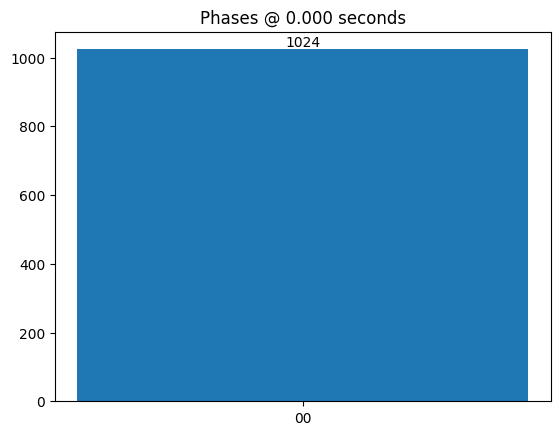

Time simulation run (sec):  0.1
{'00': 13, '10': 81, '01': 79, '11': 851}
['00', '10', '01', '11']
[13, 81, 79, 851]


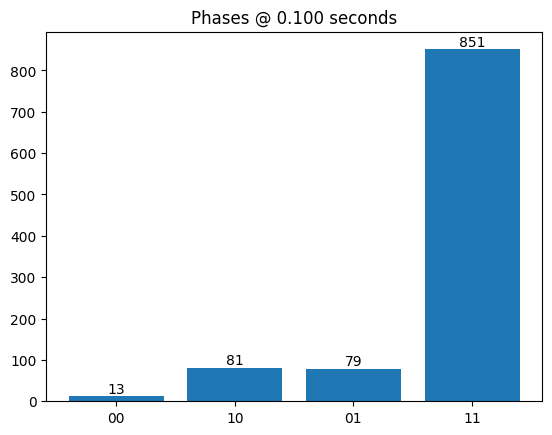

Time simulation run (sec):  0.2
{'01': 216, '11': 89, '10': 226, '00': 493}
['01', '11', '10', '00']
[216, 89, 226, 493]


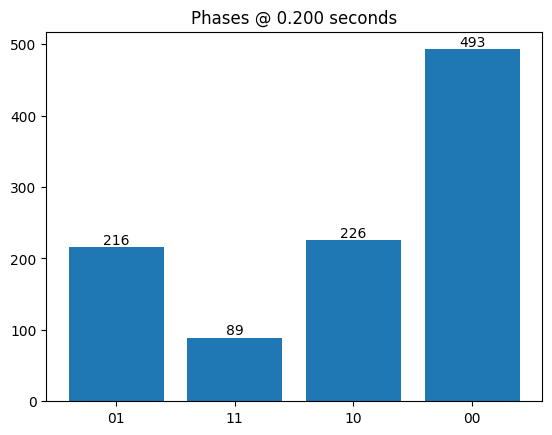

Time simulation run (sec):  0.3
{'01': 255, '11': 177, '10': 273, '00': 319}
['01', '11', '10', '00']
[255, 177, 273, 319]


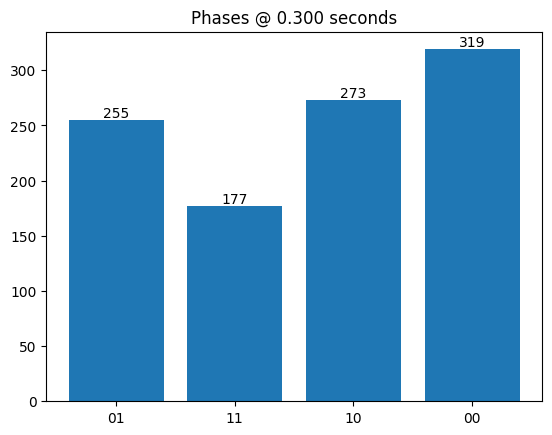

Time simulation run (sec):  0.4
{'01': 136, '11': 624, '10': 143, '00': 121}
['01', '11', '10', '00']
[136, 624, 143, 121]


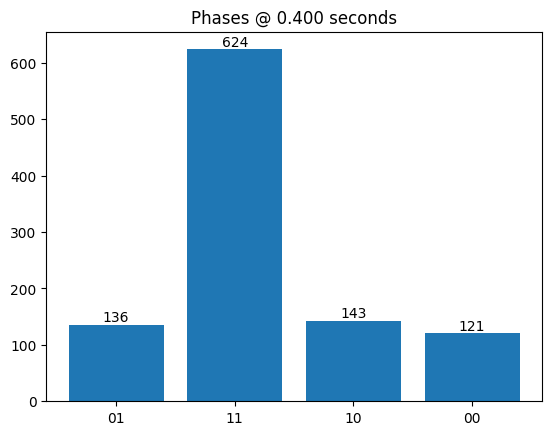

Time simulation run (sec):  0.5
{'01': 9, '11': 197, '10': 20, '00': 798}
['01', '11', '10', '00']
[9, 197, 20, 798]


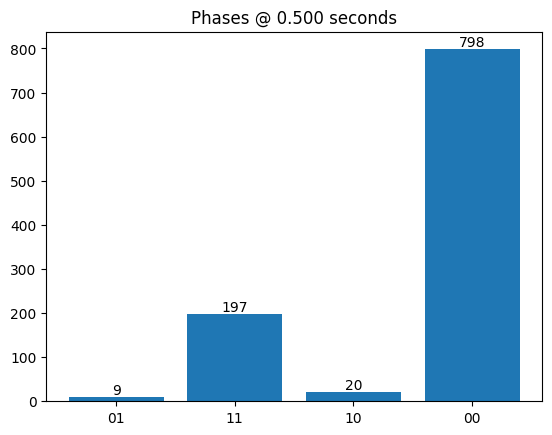

Time simulation run (sec):  0.6
{'01': 28, '10': 27, '00': 220, '11': 749}
['01', '10', '00', '11']
[28, 27, 220, 749]


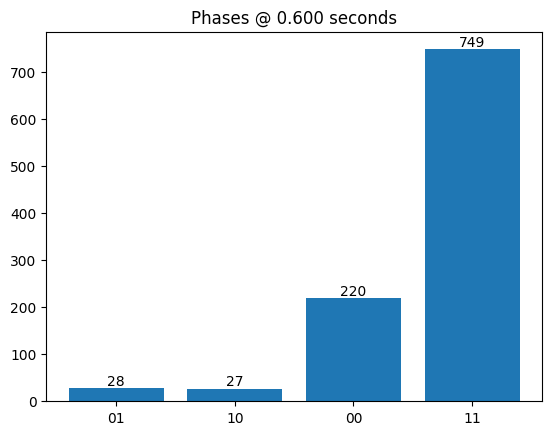

Time simulation run (sec):  0.7000000000000001
{'01': 143, '11': 221, '10': 168, '00': 492}
['01', '11', '10', '00']
[143, 221, 168, 492]


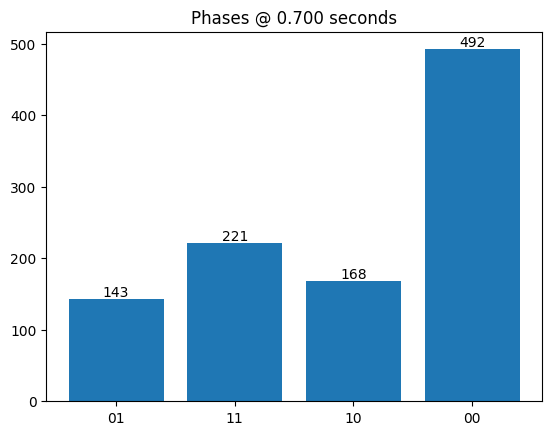

Time simulation run (sec):  0.8
{'11': 282, '01': 243, '10': 259, '00': 240}
['11', '01', '10', '00']
[282, 243, 259, 240]


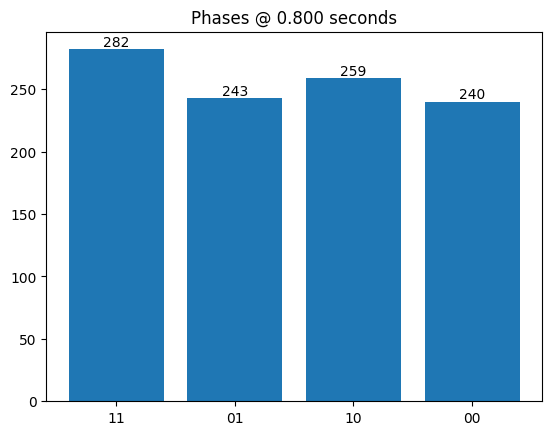

Time simulation run (sec):  0.9
{'01': 181, '10': 199, '00': 313, '11': 331}
['01', '10', '00', '11']
[181, 199, 313, 331]


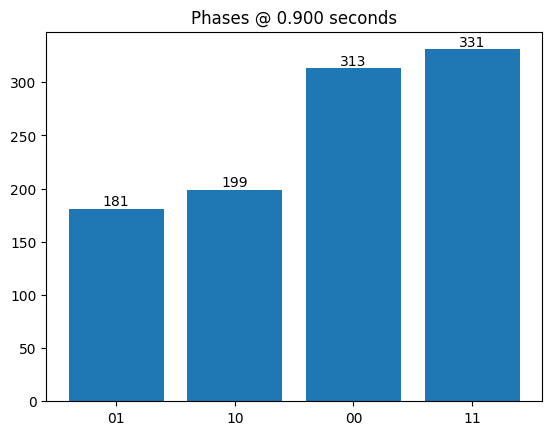

Time simulation run (sec):  1.0
{'11': 511, '10': 67, '00': 396, '01': 50}
['11', '10', '00', '01']
[511, 67, 396, 50]


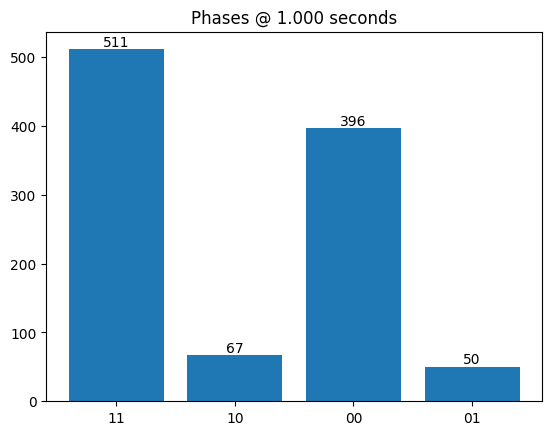

Time simulation run (sec):  1.1
{'01': 1, '11': 379, '10': 1, '00': 643}
['01', '11', '10', '00']
[1, 379, 1, 643]


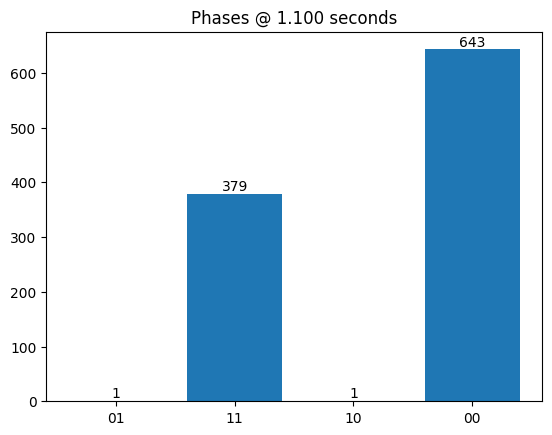

Time simulation run (sec):  1.2
{'01': 107, '00': 247, '10': 99, '11': 571}
['01', '00', '10', '11']
[107, 247, 99, 571]


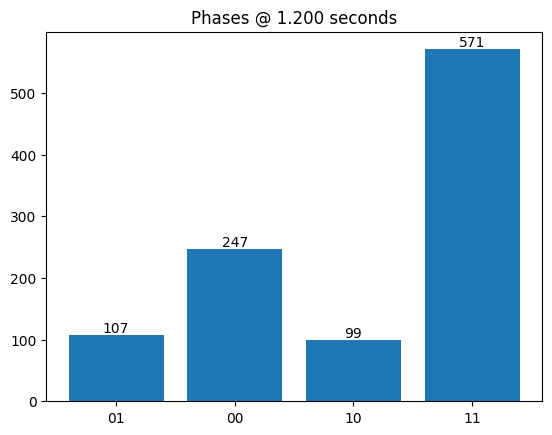

Time simulation run (sec):  1.3
{'10': 222, '00': 383, '11': 209, '01': 210}
['10', '00', '11', '01']
[222, 383, 209, 210]


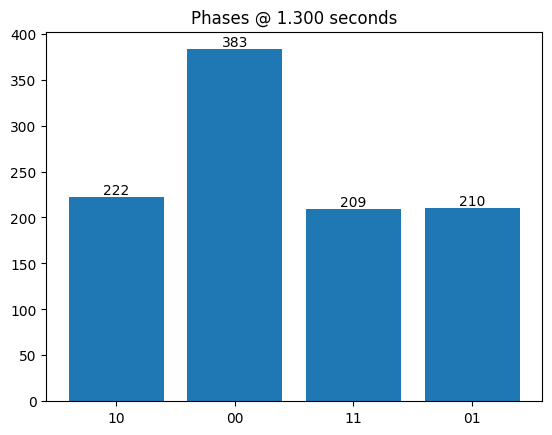

Time simulation run (sec):  1.4000000000000001
{'01': 250, '11': 167, '00': 361, '10': 246}
['01', '11', '00', '10']
[250, 167, 361, 246]


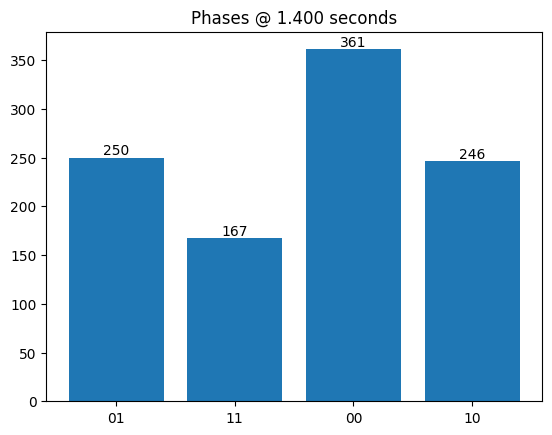

Time simulation run (sec):  1.5
{'00': 87, '10': 117, '01': 121, '11': 699}
['00', '10', '01', '11']
[87, 117, 121, 699]


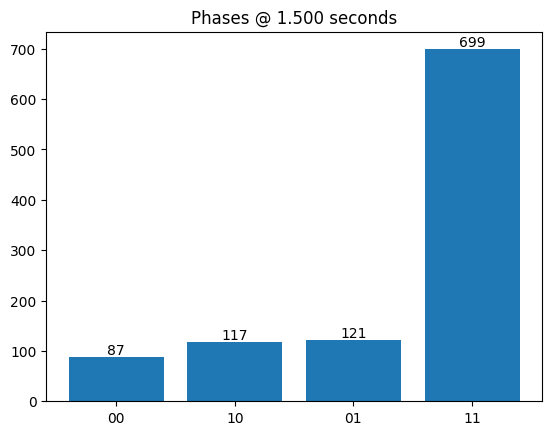

Time simulation run (sec):  1.6
{'11': 35, '01': 13, '10': 2, '00': 974}
['11', '01', '10', '00']
[35, 13, 2, 974]


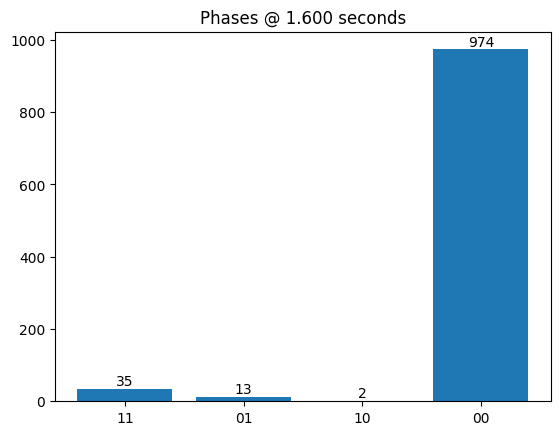

Time simulation run (sec):  1.7
{'01': 40, '10': 36, '00': 18, '11': 930}
['01', '10', '00', '11']
[40, 36, 18, 930]


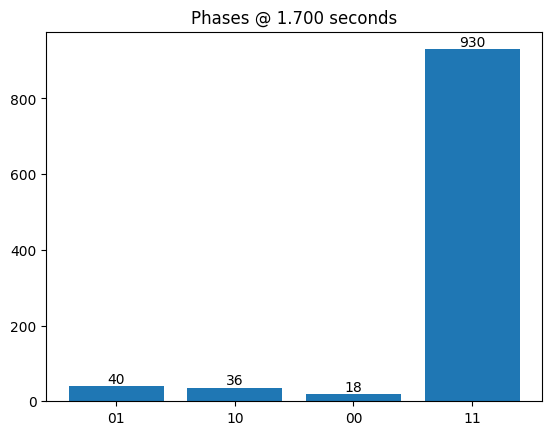

Time simulation run (sec):  1.8
{'11': 34, '10': 169, '00': 622, '01': 199}
['11', '10', '00', '01']
[34, 169, 622, 199]


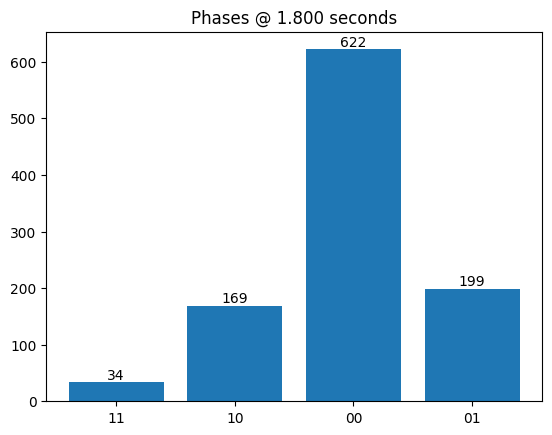

Time simulation run (sec):  1.9000000000000001
{'11': 250, '01': 308, '10': 227, '00': 239}
['11', '01', '10', '00']
[250, 308, 227, 239]


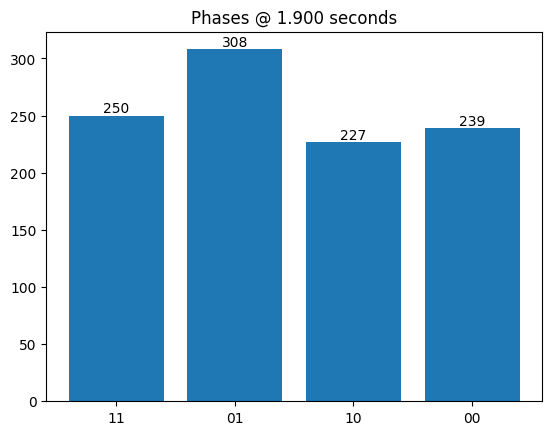

Time simulation run (sec):  2.0
{'00': 59, '10': 214, '11': 559, '01': 192}
['00', '10', '11', '01']
[59, 214, 559, 192]


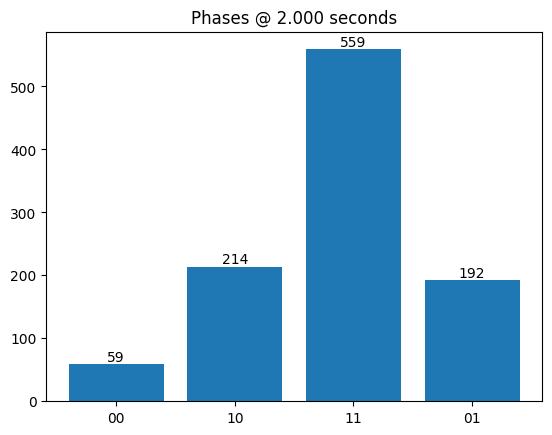

Time simulation run (sec):  2.1
{'11': 52, '01': 50, '10': 45, '00': 877}
['11', '01', '10', '00']
[52, 50, 45, 877]


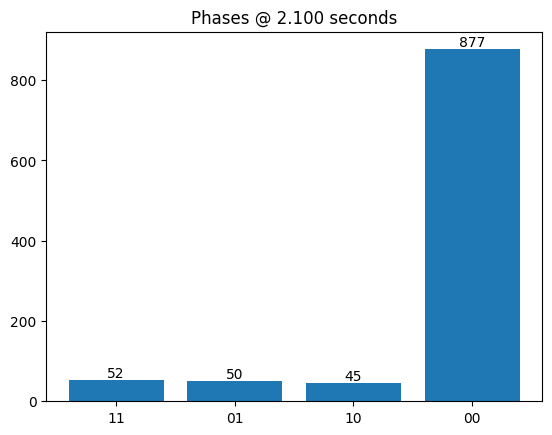

Time simulation run (sec):  2.2
{'01': 1, '10': 5, '00': 89, '11': 929}
['01', '10', '00', '11']
[1, 5, 89, 929]


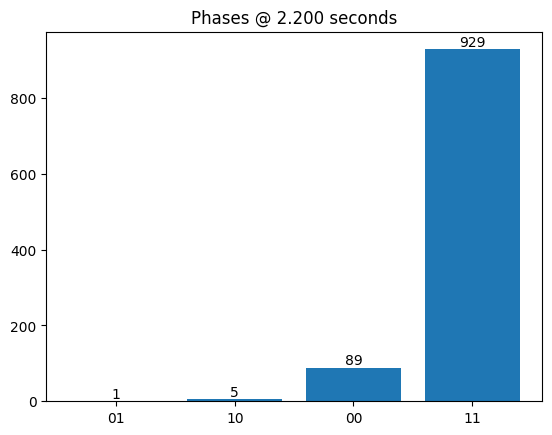

Time simulation run (sec):  2.3000000000000003
{'11': 126, '01': 103, '10': 99, '00': 696}
['11', '01', '10', '00']
[126, 103, 99, 696]


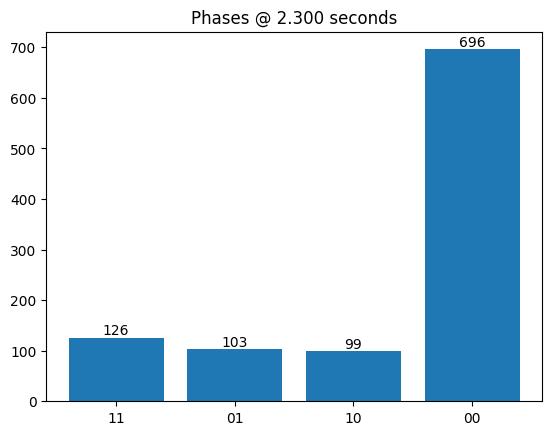

Time simulation run (sec):  2.4
{'01': 230, '00': 182, '10': 260, '11': 352}
['01', '00', '10', '11']
[230, 182, 260, 352]


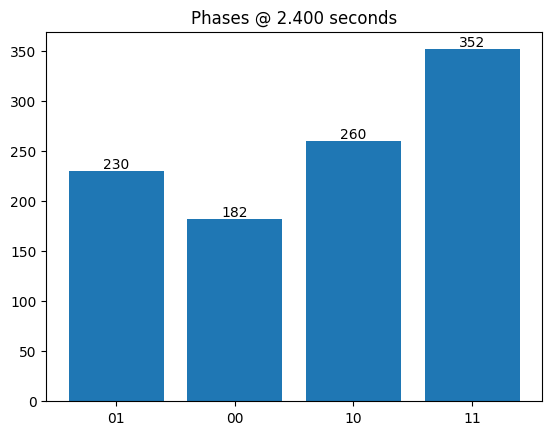

Time simulation run (sec):  2.5
{'11': 330, '00': 196, '10': 251, '01': 247}
['11', '00', '10', '01']
[330, 196, 251, 247]


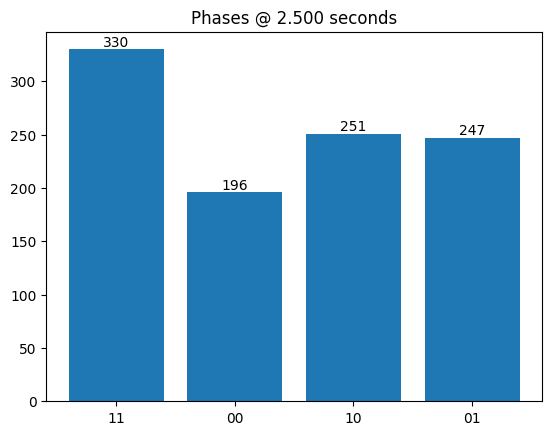

Time simulation run (sec):  2.6
{'01': 121, '11': 313, '00': 487, '10': 103}
['01', '11', '00', '10']
[121, 313, 487, 103]


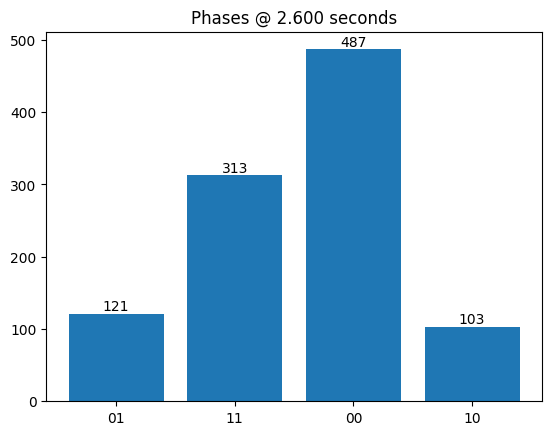

Time simulation run (sec):  2.7
{'01': 6, '11': 542, '10': 8, '00': 468}
['01', '11', '10', '00']
[6, 542, 8, 468]


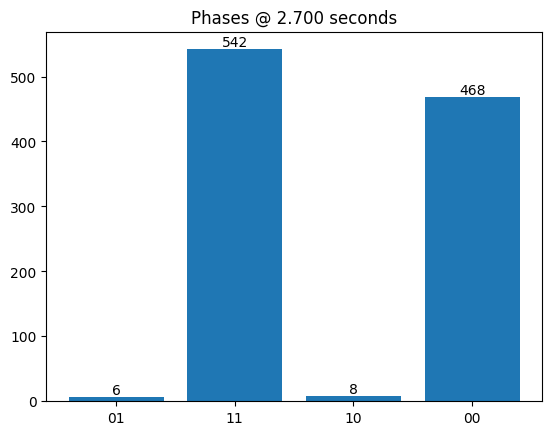

Time simulation run (sec):  2.8000000000000003
{'01': 58, '10': 56, '00': 456, '11': 454}
['01', '10', '00', '11']
[58, 56, 456, 454]


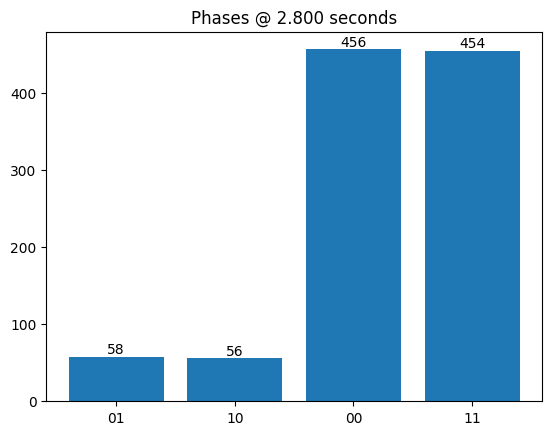

Time simulation run (sec):  2.9
{'10': 161, '00': 392, '11': 294, '01': 177}
['10', '00', '11', '01']
[161, 392, 294, 177]


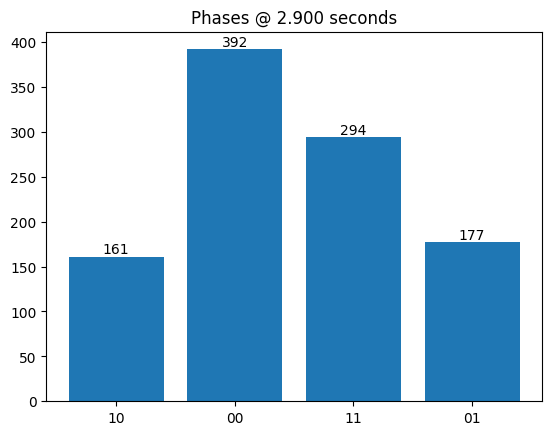

Time simulation run (sec):  3.0
{'01': 282, '11': 230, '10': 268, '00': 244}
['01', '11', '10', '00']
[282, 230, 268, 244]


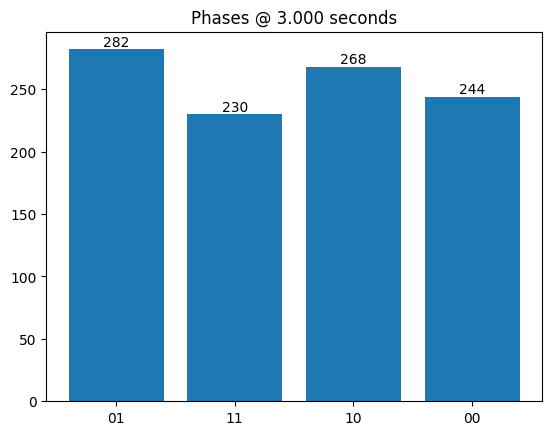

Time simulation run (sec):  3.1
{'10': 183, '00': 164, '11': 503, '01': 174}
['10', '00', '11', '01']
[183, 164, 503, 174]


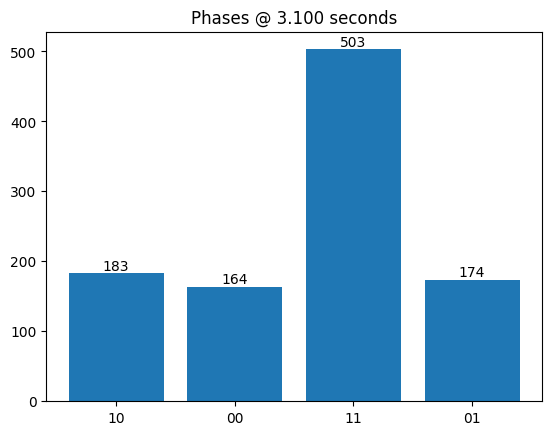

Time simulation run (sec):  3.2
{'01': 36, '11': 150, '10': 45, '00': 793}
['01', '11', '10', '00']
[36, 150, 45, 793]


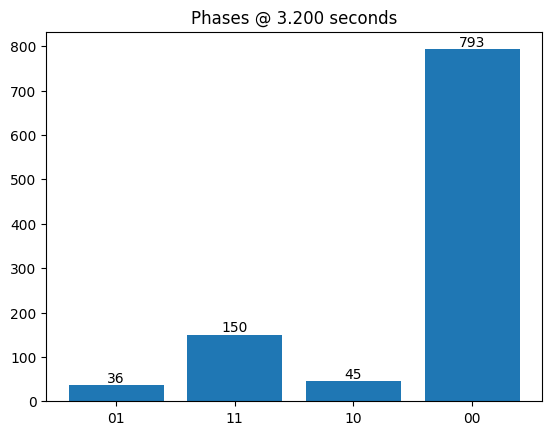

Time simulation run (sec):  3.3000000000000003
{'01': 7, '10': 12, '00': 110, '11': 895}
['01', '10', '00', '11']
[7, 12, 110, 895]


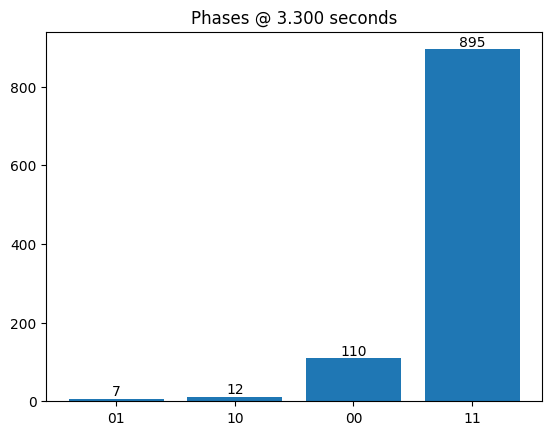

Time simulation run (sec):  3.4
{'11': 69, '01': 113, '10': 111, '00': 731}
['11', '01', '10', '00']
[69, 113, 111, 731]


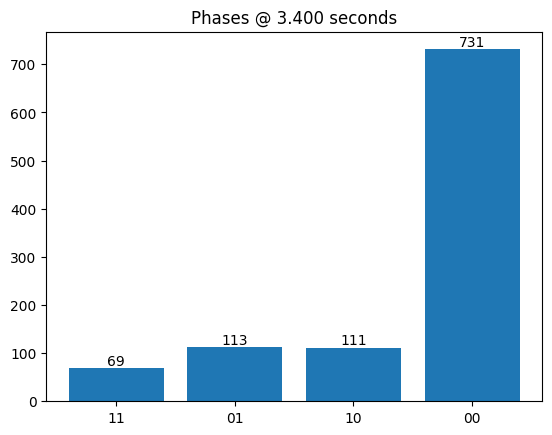

Time simulation run (sec):  3.5
{'01': 233, '11': 397, '00': 166, '10': 228}
['01', '11', '00', '10']
[233, 397, 166, 228]


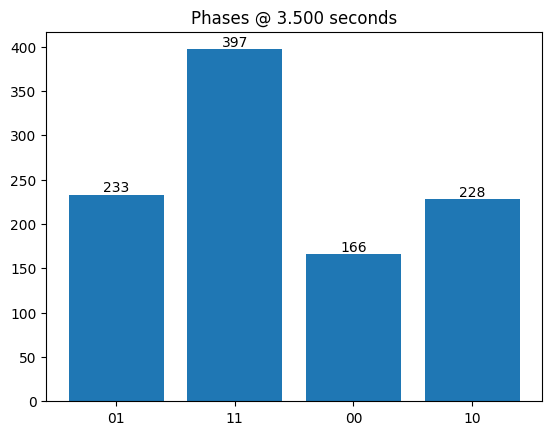

Time simulation run (sec):  3.6
{'11': 424, '01': 241, '00': 127, '10': 232}
['11', '01', '00', '10']
[424, 241, 127, 232]


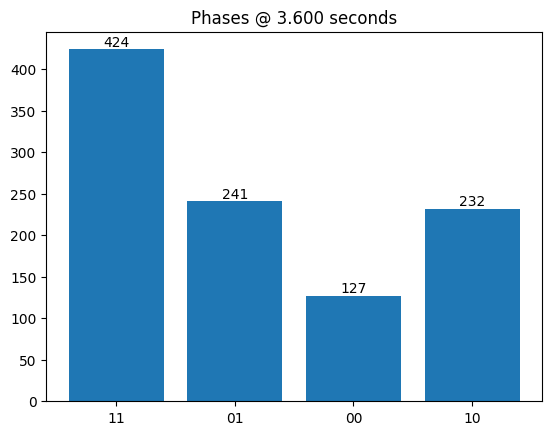

Time simulation run (sec):  3.7
{'11': 9, '10': 104, '00': 813, '01': 98}
['11', '10', '00', '01']
[9, 104, 813, 98]


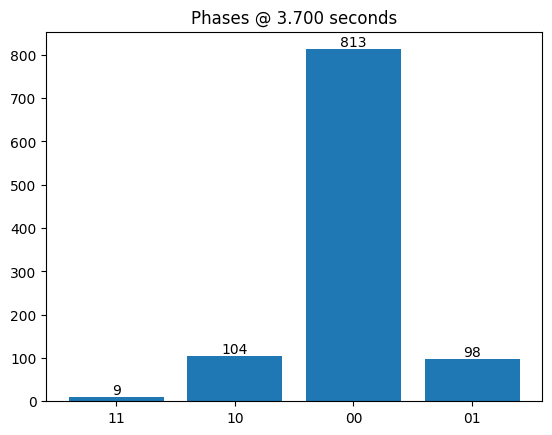

Time simulation run (sec):  3.8000000000000003
{'01': 1, '00': 9, '10': 3, '11': 1011}
['01', '00', '10', '11']
[1, 9, 3, 1011]


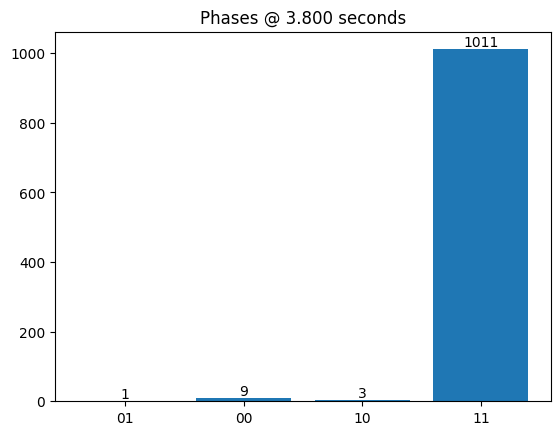

Time simulation run (sec):  3.9
{'11': 27, '01': 67, '10': 42, '00': 888}
['11', '01', '10', '00']
[27, 67, 42, 888]


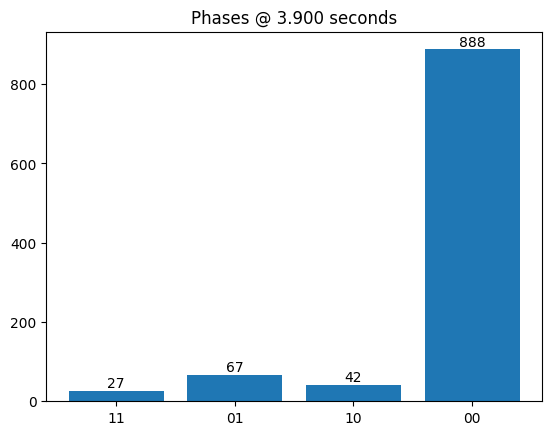

Time simulation run (sec):  4.0
{'11': 514, '00': 92, '10': 190, '01': 228}
['11', '00', '10', '01']
[514, 92, 190, 228]


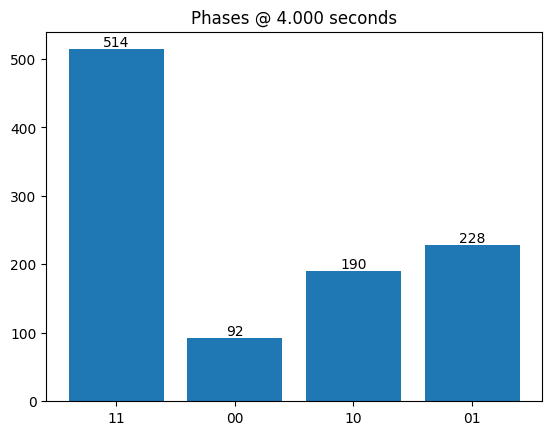

Time simulation run (sec):  4.1
{'01': 264, '11': 281, '10': 236, '00': 243}
['01', '11', '10', '00']
[264, 281, 236, 243]


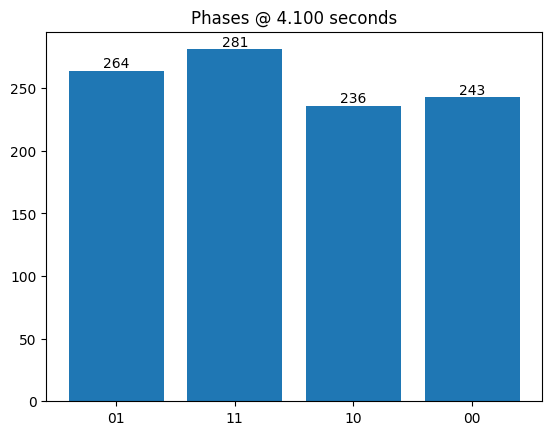

Time simulation run (sec):  4.2
{'01': 157, '11': 154, '10': 168, '00': 545}
['01', '11', '10', '00']
[157, 154, 168, 545]


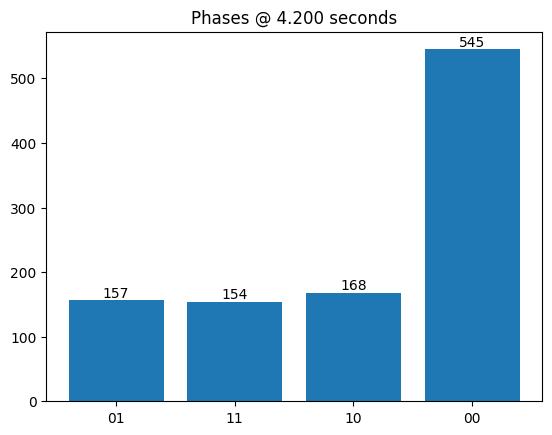

Time simulation run (sec):  4.3
{'01': 30, '10': 27, '00': 233, '11': 734}
['01', '10', '00', '11']
[30, 27, 233, 734]


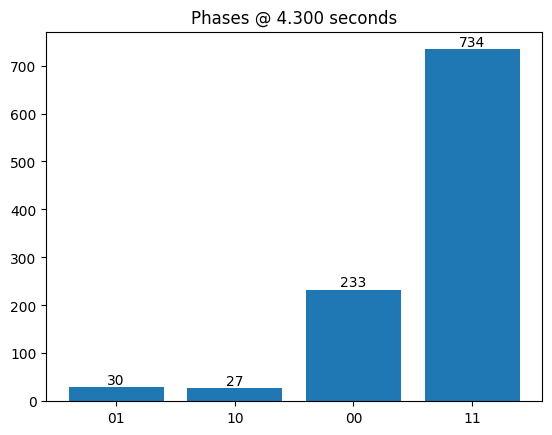

Time simulation run (sec):  4.4
{'01': 11, '11': 306, '10': 15, '00': 692}
['01', '11', '10', '00']
[11, 306, 15, 692]


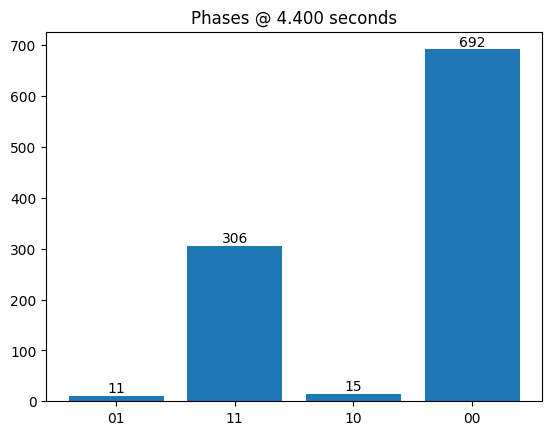

Time simulation run (sec):  4.5
{'01': 152, '10': 132, '00': 304, '11': 436}
['01', '10', '00', '11']
[152, 132, 304, 436]


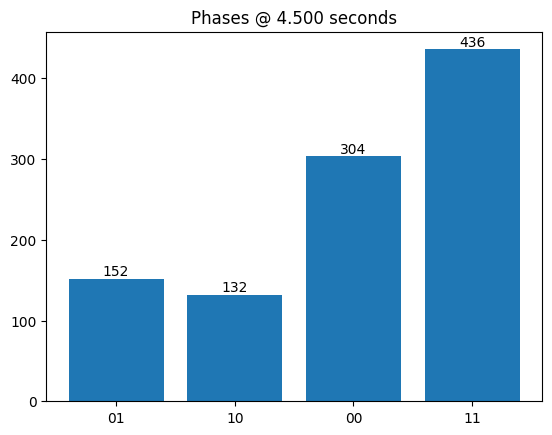

Time simulation run (sec):  4.6000000000000005
{'11': 262, '10': 240, '00': 262, '01': 260}
['11', '10', '00', '01']
[262, 240, 262, 260]


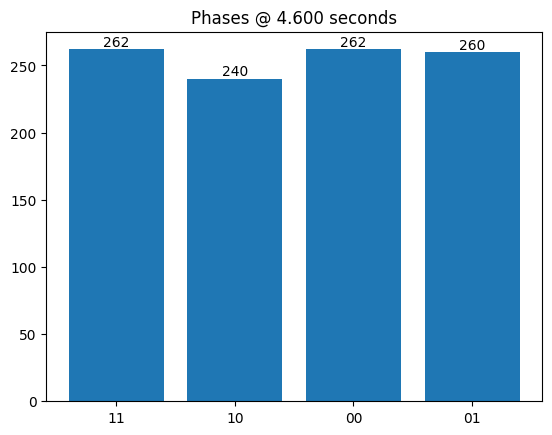

Time simulation run (sec):  4.7
{'01': 236, '11': 333, '10': 186, '00': 269}
['01', '11', '10', '00']
[236, 333, 186, 269]


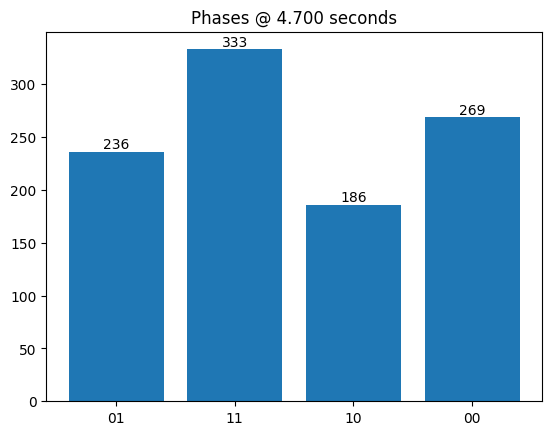

Time simulation run (sec):  4.8
{'01': 79, '11': 308, '10': 77, '00': 560}
['01', '11', '10', '00']
[79, 308, 77, 560]


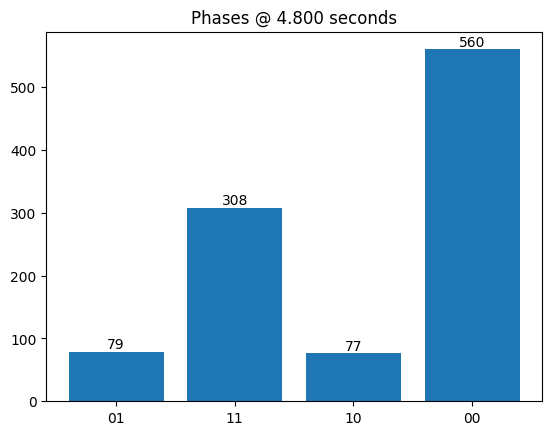

Time simulation run (sec):  4.9
{'00': 282, '11': 742}
['00', '11']
[282, 742]


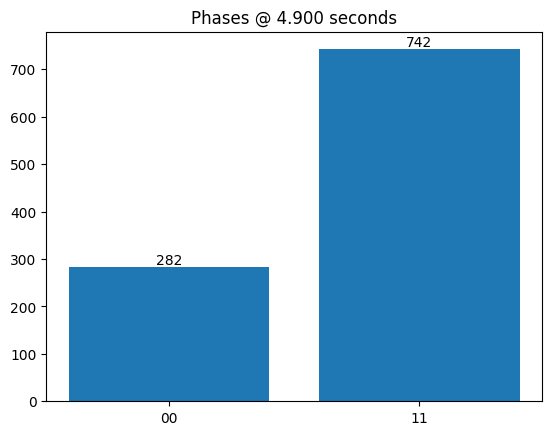

Time simulation run (sec):  5.0
{'01': 61, '11': 179, '00': 706, '10': 78}
['01', '11', '00', '10']
[61, 179, 706, 78]


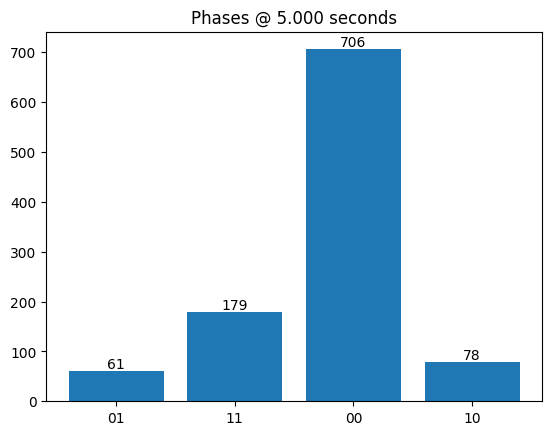

Time simulation run (sec):  5.1000000000000005
{'01': 227, '11': 466, '00': 134, '10': 197}
['01', '11', '00', '10']
[227, 466, 134, 197]


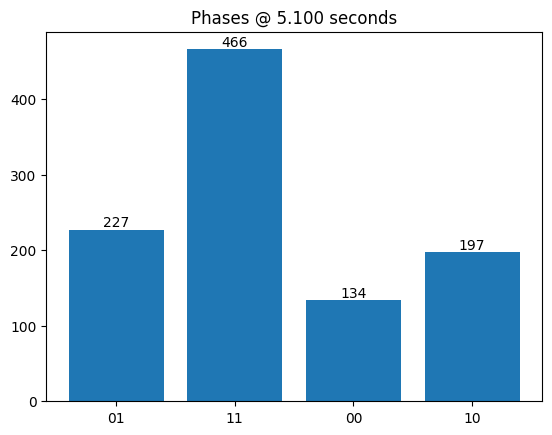

Time simulation run (sec):  5.2
{'11': 331, '01': 266, '10': 235, '00': 192}
['11', '01', '10', '00']
[331, 266, 235, 192]


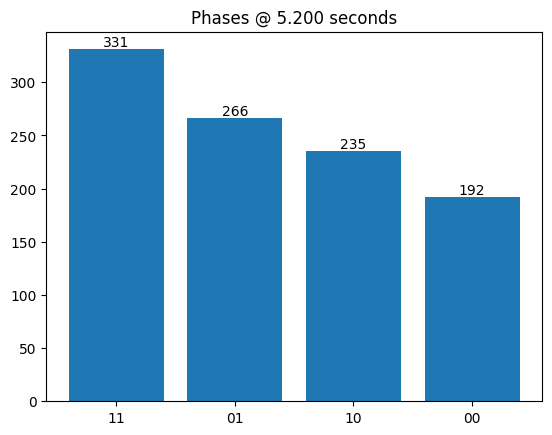

Time simulation run (sec):  5.3
{'01': 154, '11': 61, '00': 669, '10': 140}
['01', '11', '00', '10']
[154, 61, 669, 140]


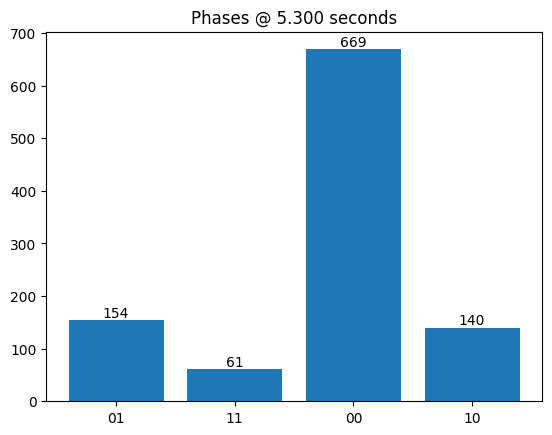

Time simulation run (sec):  5.4
{'01': 21, '10': 19, '00': 11, '11': 973}
['01', '10', '00', '11']
[21, 19, 11, 973]


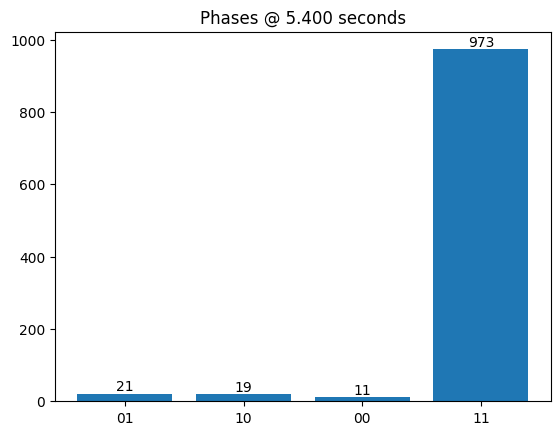

Time simulation run (sec):  5.5
{'11': 1, '01': 18, '10': 22, '00': 983}
['11', '01', '10', '00']
[1, 18, 22, 983]


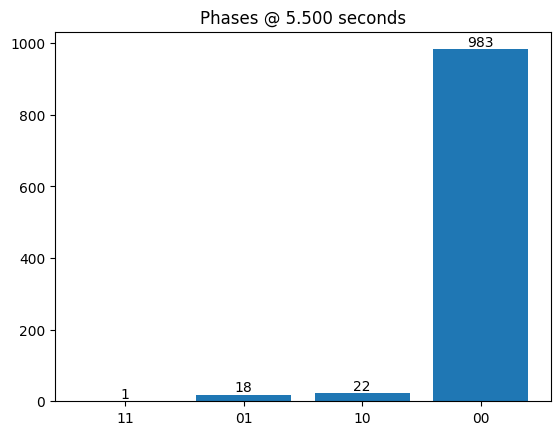

Time simulation run (sec):  5.6000000000000005
{'00': 35, '10': 160, '01': 151, '11': 678}
['00', '10', '01', '11']
[35, 160, 151, 678]


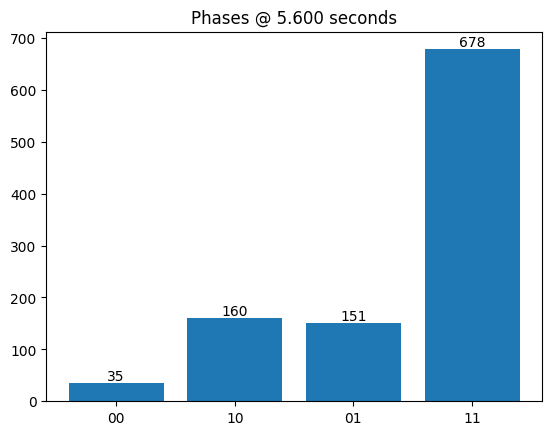

Time simulation run (sec):  5.7
{'11': 211, '01': 257, '00': 300, '10': 256}
['11', '01', '00', '10']
[211, 257, 300, 256]


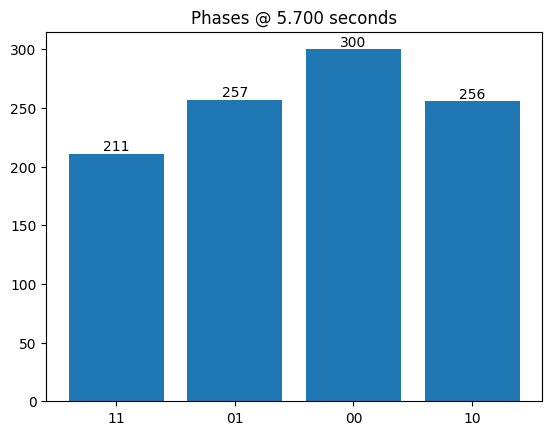

Time simulation run (sec):  5.8
{'11': 118, '01': 221, '10': 205, '00': 480}
['11', '01', '10', '00']
[118, 221, 205, 480]


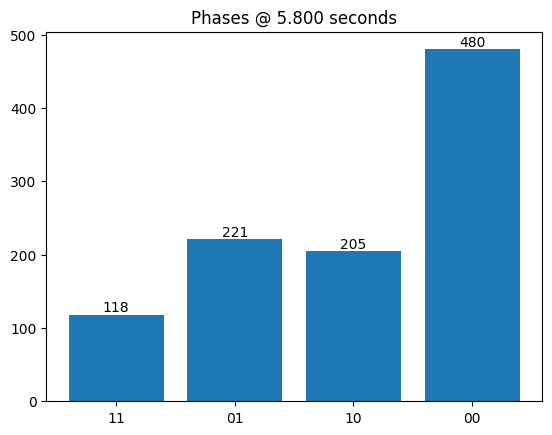

Time simulation run (sec):  5.9
{'01': 64, '11': 812, '00': 86, '10': 62}
['01', '11', '00', '10']
[64, 812, 86, 62]


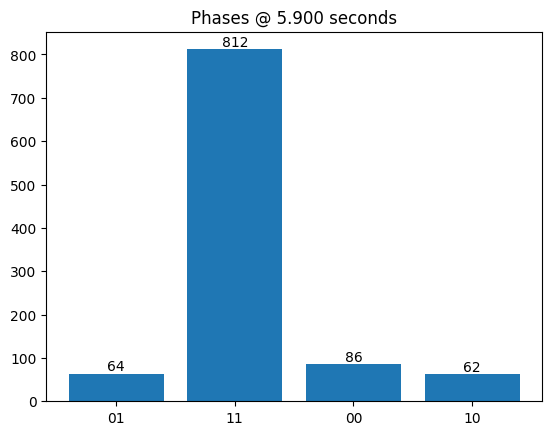

Time simulation run (sec):  6.0
{'11': 127, '00': 897}
['11', '00']
[127, 897]


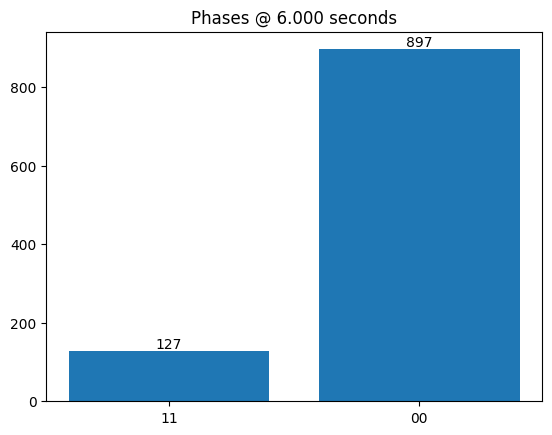

Time simulation run (sec):  6.1000000000000005
{'01': 94, '11': 659, '10': 81, '00': 190}
['01', '11', '10', '00']
[94, 659, 81, 190]


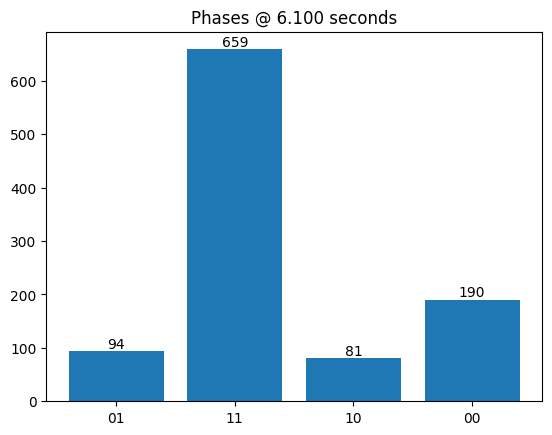

Time simulation run (sec):  6.2
{'11': 225, '01': 220, '10': 234, '00': 345}
['11', '01', '10', '00']
[225, 220, 234, 345]


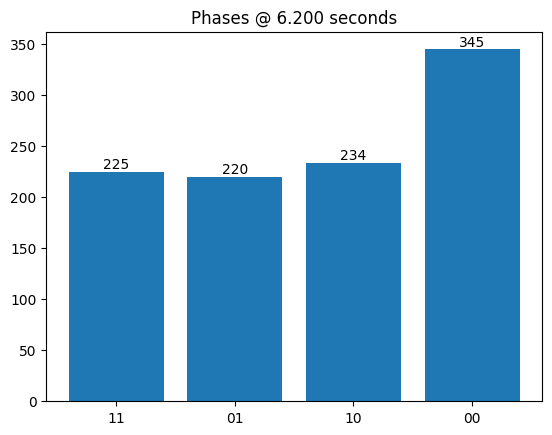

Time simulation run (sec):  6.3
{'01': 247, '00': 301, '10': 231, '11': 245}
['01', '00', '10', '11']
[247, 301, 231, 245]


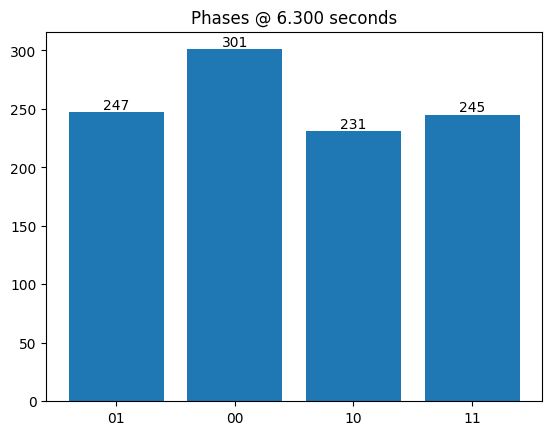

Time simulation run (sec):  6.4
{'01': 136, '00': 361, '10': 137, '11': 390}
['01', '00', '10', '11']
[136, 361, 137, 390]


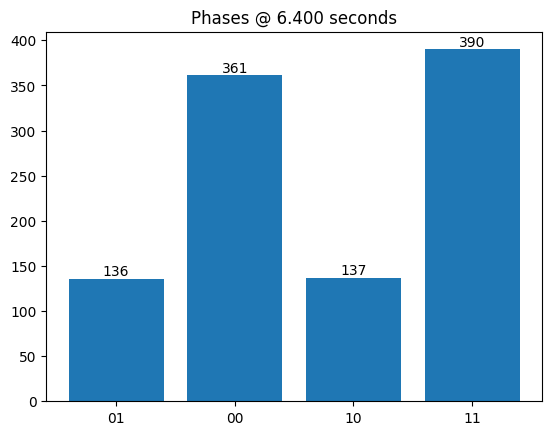

Time simulation run (sec):  6.5
{'01': 11, '11': 531, '10': 11, '00': 471}
['01', '11', '10', '00']
[11, 531, 11, 471]


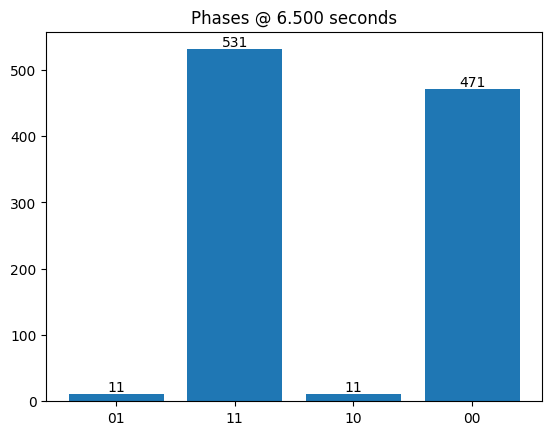

Time simulation run (sec):  6.6000000000000005
{'01': 27, '11': 387, '10': 28, '00': 582}
['01', '11', '10', '00']
[27, 387, 28, 582]


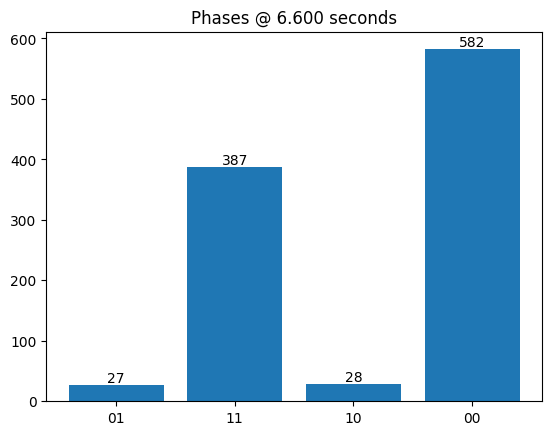

Time simulation run (sec):  6.7
{'01': 144, '11': 471, '10': 156, '00': 253}
['01', '11', '10', '00']
[144, 471, 156, 253]


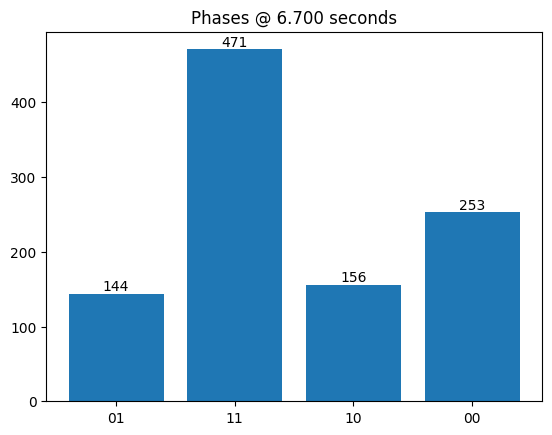

Time simulation run (sec):  6.8
{'11': 251, '01': 235, '00': 282, '10': 256}
['11', '01', '00', '10']
[251, 235, 282, 256]


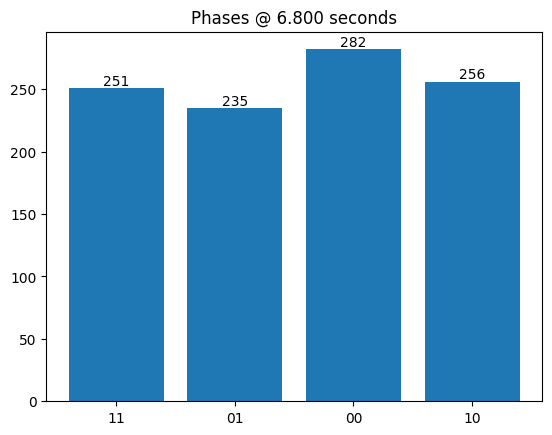

Time simulation run (sec):  6.9
{'11': 137, '01': 201, '10': 185, '00': 501}
['11', '01', '10', '00']
[137, 201, 185, 501]


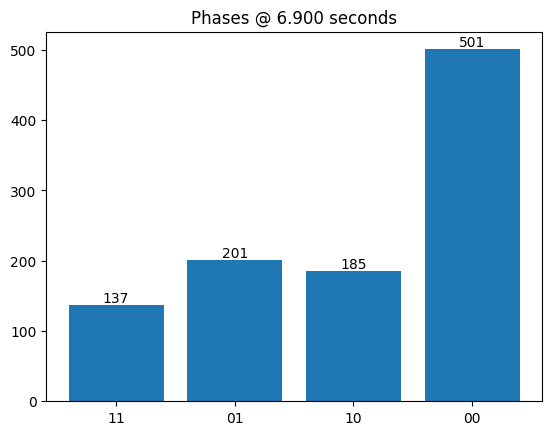

Time simulation run (sec):  7.0
{'01': 41, '10': 48, '00': 100, '11': 835}
['01', '10', '00', '11']
[41, 48, 100, 835]


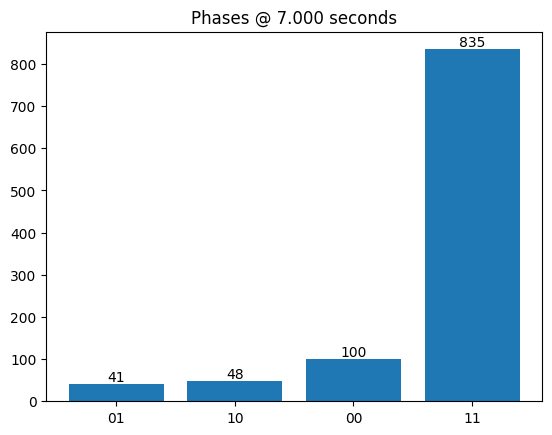

Time simulation run (sec):  7.1000000000000005
{'01': 7, '11': 57, '10': 4, '00': 956}
['01', '11', '10', '00']
[7, 57, 4, 956]


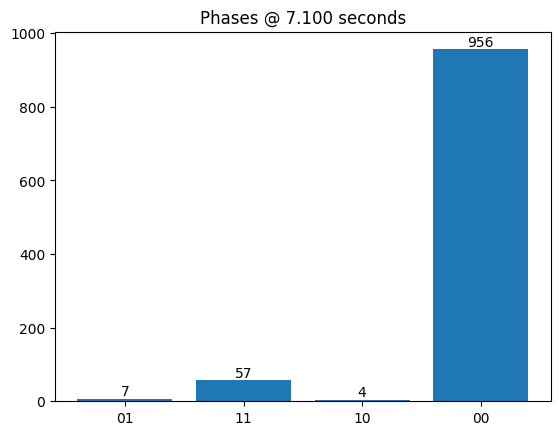

Time simulation run (sec):  7.2
{'10': 89, '00': 32, '11': 796, '01': 107}
['10', '00', '11', '01']
[89, 32, 796, 107]


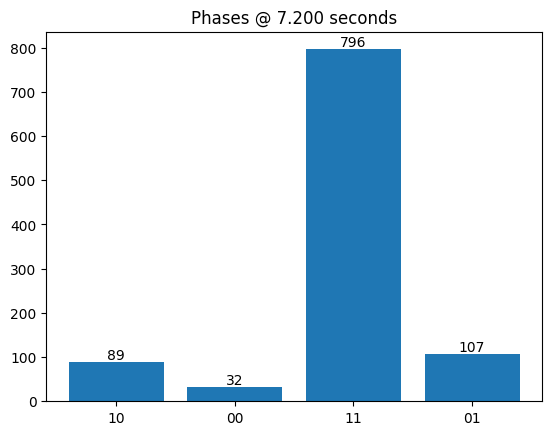

Time simulation run (sec):  7.3
{'11': 111, '01': 238, '10': 241, '00': 434}
['11', '01', '10', '00']
[111, 238, 241, 434]


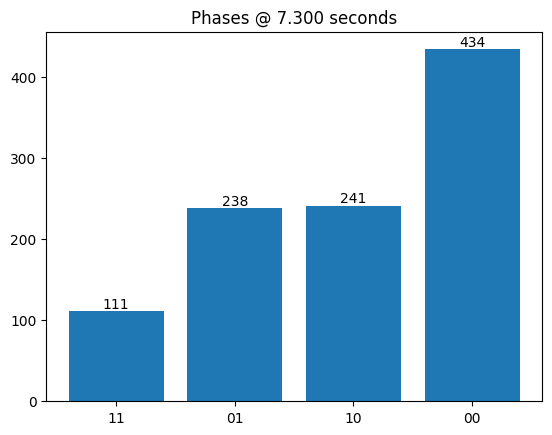

Time simulation run (sec):  7.4
{'10': 244, '00': 417, '11': 136, '01': 227}
['10', '00', '11', '01']
[244, 417, 136, 227]


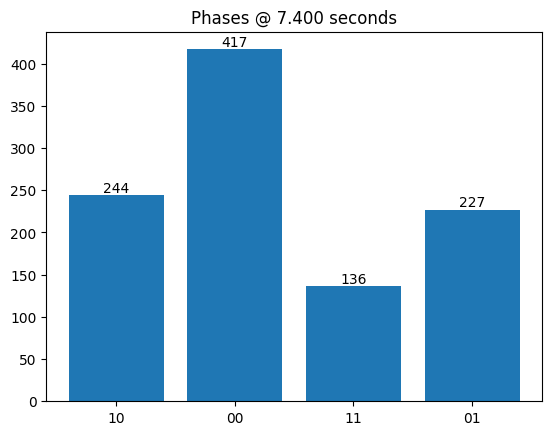

Time simulation run (sec):  7.5
{'00': 32, '10': 105, '01': 104, '11': 783}
['00', '10', '01', '11']
[32, 105, 104, 783]


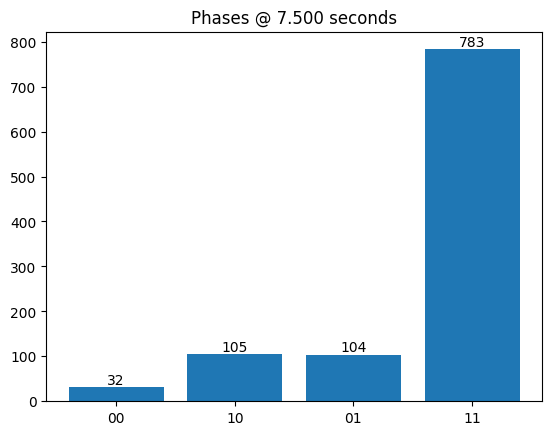

Time simulation run (sec):  7.6000000000000005
{'01': 4, '11': 31, '10': 2, '00': 987}
['01', '11', '10', '00']
[4, 31, 2, 987]


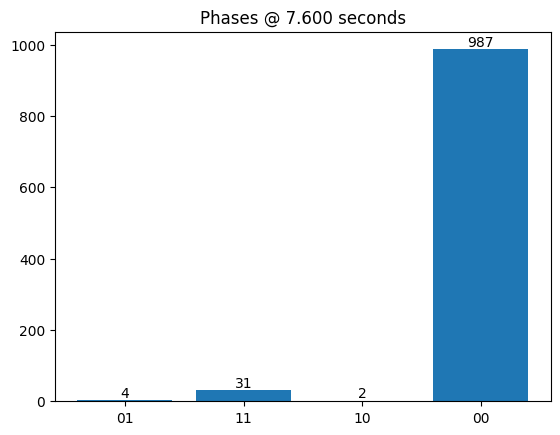

Time simulation run (sec):  7.7
{'01': 35, '10': 43, '00': 62, '11': 884}
['01', '10', '00', '11']
[35, 43, 62, 884]


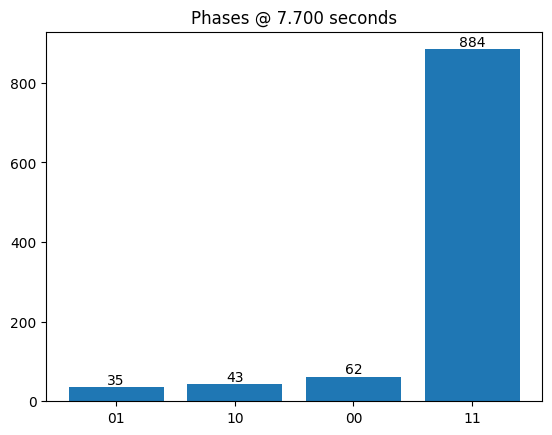

Time simulation run (sec):  7.8
{'11': 116, '01': 178, '00': 568, '10': 162}
['11', '01', '00', '10']
[116, 178, 568, 162]


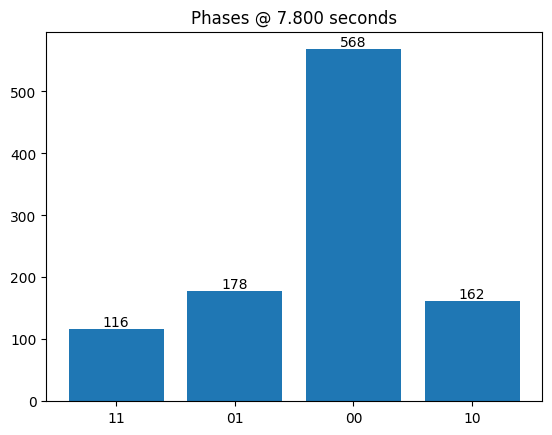

Time simulation run (sec):  7.9
{'01': 272, '11': 279, '10': 229, '00': 244}
['01', '11', '10', '00']
[272, 279, 229, 244]


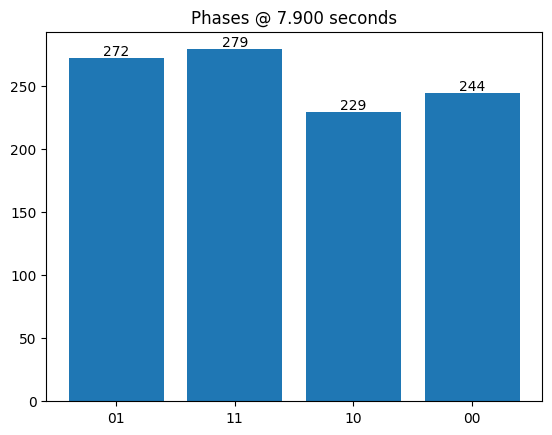

Time simulation run (sec):  8.0
{'11': 481, '00': 195, '10': 185, '01': 163}
['11', '00', '10', '01']
[481, 195, 185, 163]


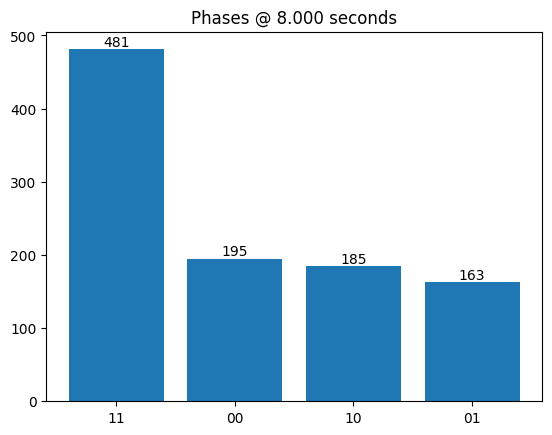

Time simulation run (sec):  8.1
{'01': 43, '11': 314, '10': 52, '00': 615}
['01', '11', '10', '00']
[43, 314, 52, 615]


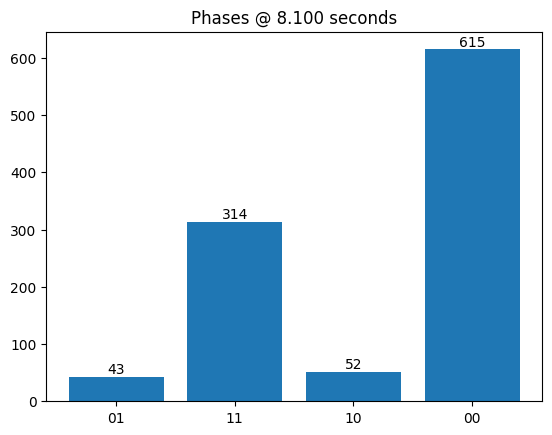

Time simulation run (sec):  8.2
{'01': 4, '11': 595, '10': 12, '00': 413}
['01', '11', '10', '00']
[4, 595, 12, 413]


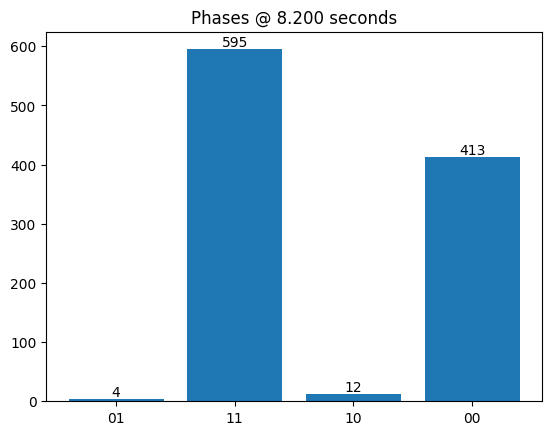

Time simulation run (sec):  8.3
{'01': 95, '11': 382, '10': 132, '00': 415}
['01', '11', '10', '00']
[95, 382, 132, 415]


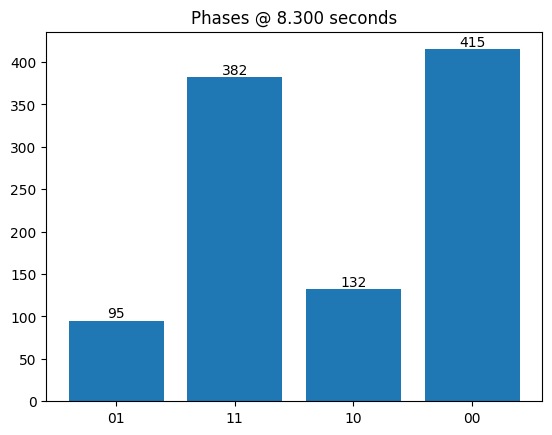

Time simulation run (sec):  8.4
{'11': 265, '01': 261, '10': 220, '00': 278}
['11', '01', '10', '00']
[265, 261, 220, 278]


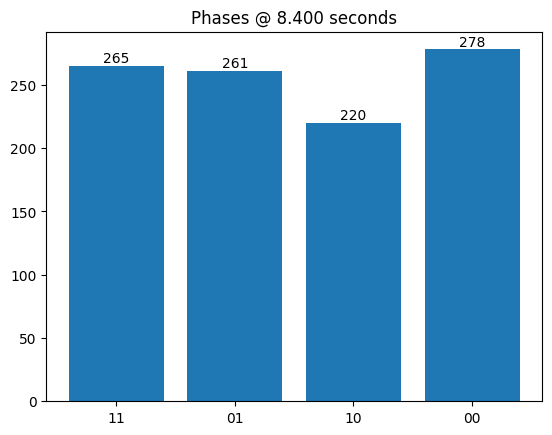

Time simulation run (sec):  8.5
{'01': 241, '11': 240, '10': 218, '00': 325}
['01', '11', '10', '00']
[241, 240, 218, 325]


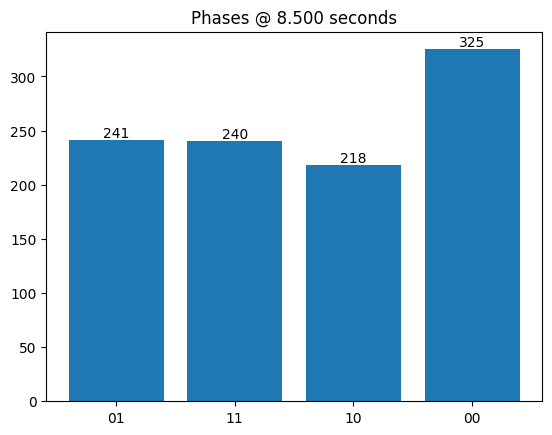

Time simulation run (sec):  8.6
{'01': 103, '10': 103, '00': 236, '11': 582}
['01', '10', '00', '11']
[103, 103, 236, 582]


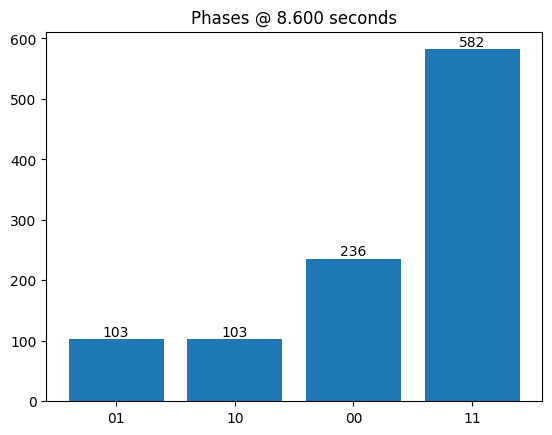

Time simulation run (sec):  8.700000000000001
{'01': 4, '11': 180, '10': 6, '00': 834}
['01', '11', '10', '00']
[4, 180, 6, 834]


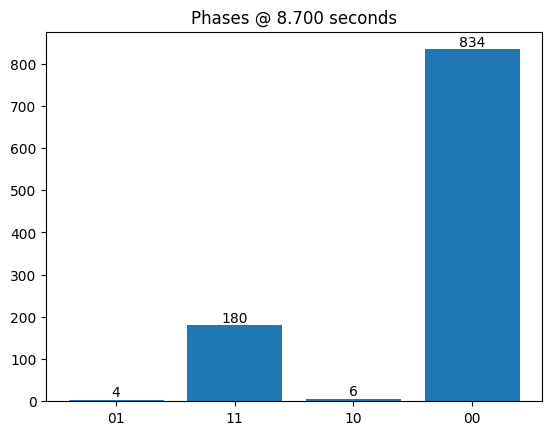

Time simulation run (sec):  8.8
{'01': 58, '10': 59, '00': 134, '11': 773}
['01', '10', '00', '11']
[58, 59, 134, 773]


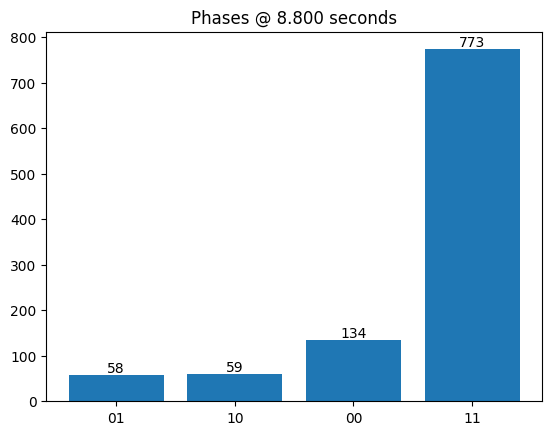

Time simulation run (sec):  8.9
{'11': 92, '01': 180, '00': 551, '10': 201}
['11', '01', '00', '10']
[92, 180, 551, 201]


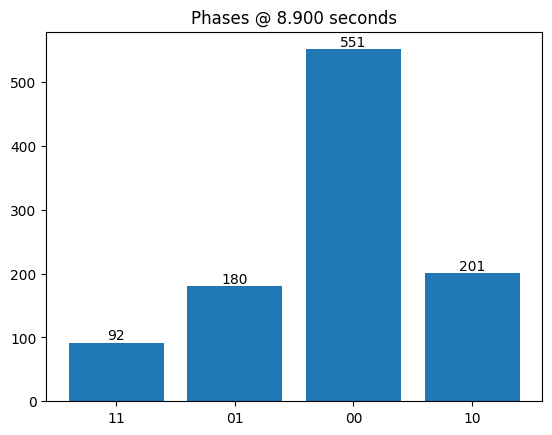

Time simulation run (sec):  9.0
{'10': 258, '00': 280, '01': 260, '11': 226}
['10', '00', '01', '11']
[258, 280, 260, 226]


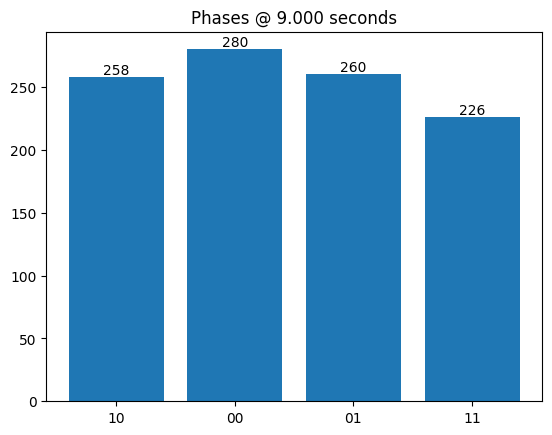

Time simulation run (sec):  9.1
{'01': 156, '11': 648, '00': 46, '10': 174}
['01', '11', '00', '10']
[156, 648, 46, 174]


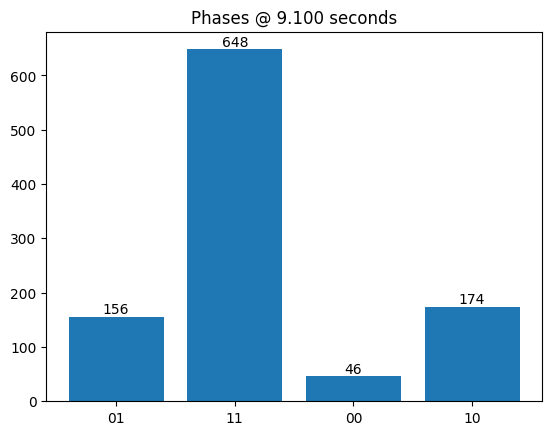

Time simulation run (sec):  9.200000000000001
{'11': 1, '10': 38, '00': 958, '01': 27}
['11', '10', '00', '01']
[1, 38, 958, 27]


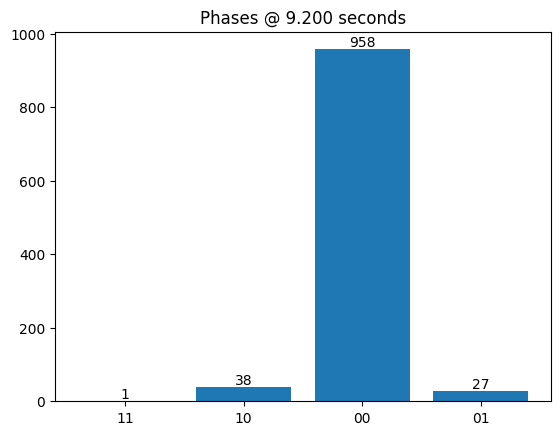

Time simulation run (sec):  9.3
{'01': 12, '00': 4, '10': 16, '11': 992}
['01', '00', '10', '11']
[12, 4, 16, 992]


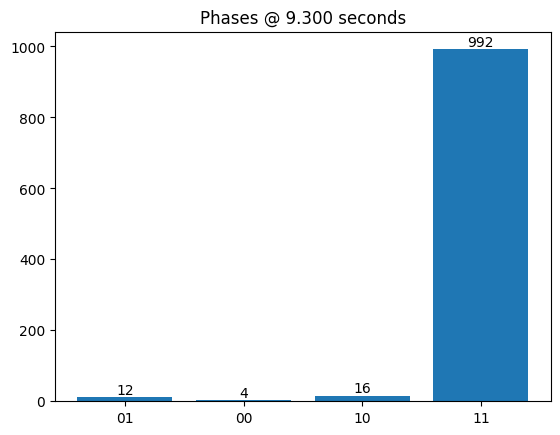

Time simulation run (sec):  9.4
{'11': 23, '01': 116, '10': 122, '00': 763}
['11', '01', '10', '00']
[23, 116, 122, 763]


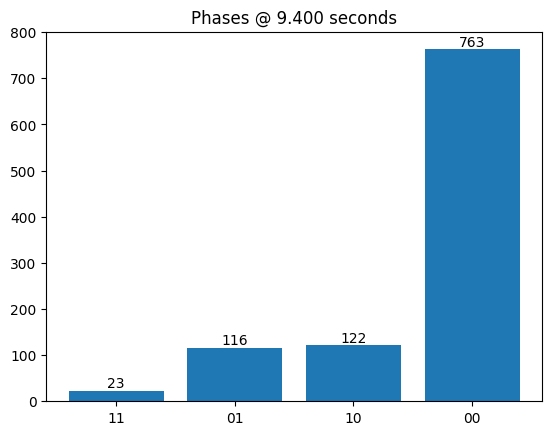

Time simulation run (sec):  9.5
{'11': 388, '01': 230, '00': 160, '10': 246}
['11', '01', '00', '10']
[388, 230, 160, 246]


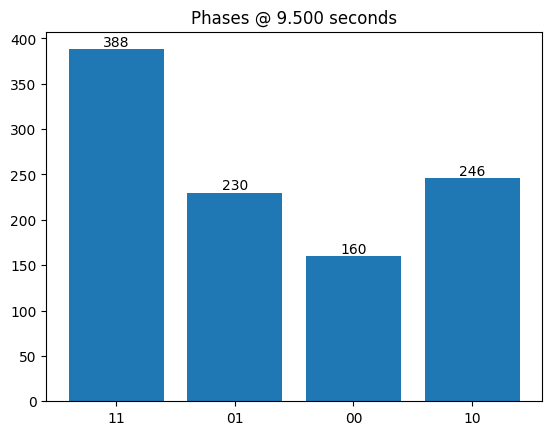

Time simulation run (sec):  9.6
{'01': 213, '11': 449, '10': 214, '00': 148}
['01', '11', '10', '00']
[213, 449, 214, 148]


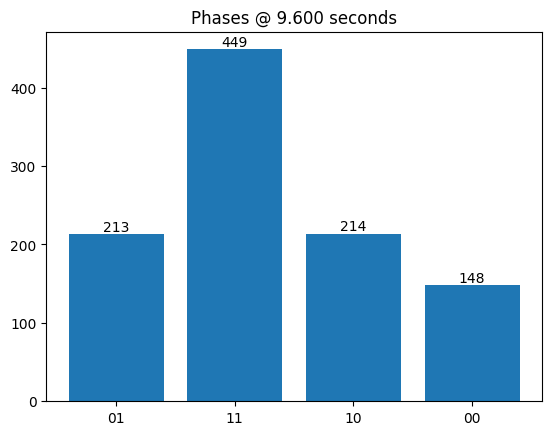

Time simulation run (sec):  9.700000000000001
{'11': 125, '01': 105, '10': 100, '00': 694}
['11', '01', '10', '00']
[125, 105, 100, 694]


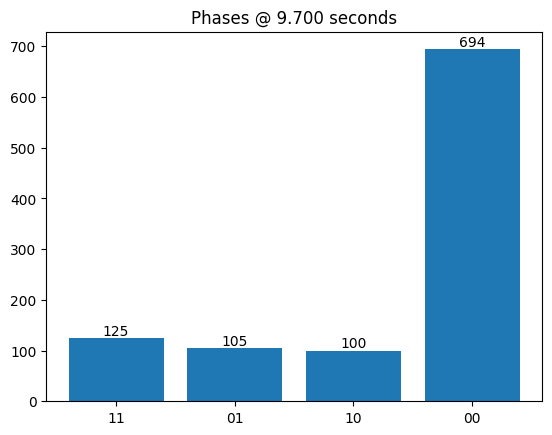

Time simulation run (sec):  9.8
{'00': 213, '11': 811}
['00', '11']
[213, 811]


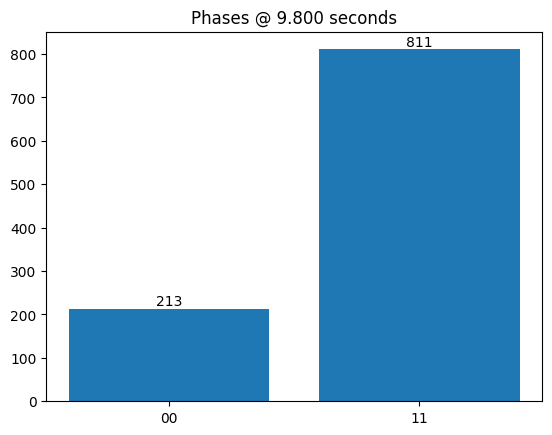

Time simulation run (sec):  9.9
{'01': 75, '11': 246, '10': 75, '00': 628}
['01', '11', '10', '00']
[75, 246, 75, 628]


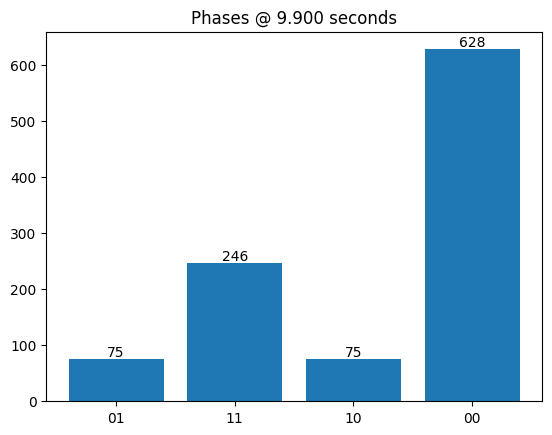

Time simulation run (sec):  10.0
{'10': 198, '00': 258, '01': 206, '11': 362}
['10', '00', '01', '11']
[198, 258, 206, 362]


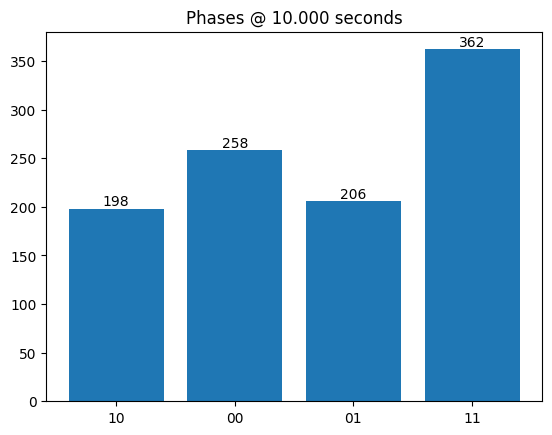

Time simulation run (sec):  10.1
{'11': 248, '10': 234, '00': 272, '01': 270}
['11', '10', '00', '01']
[248, 234, 272, 270]


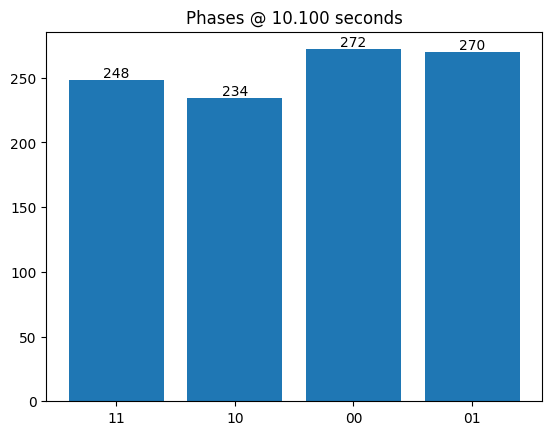

Time simulation run (sec):  10.200000000000001
{'10': 136, '00': 322, '11': 399, '01': 167}
['10', '00', '11', '01']
[136, 322, 399, 167]


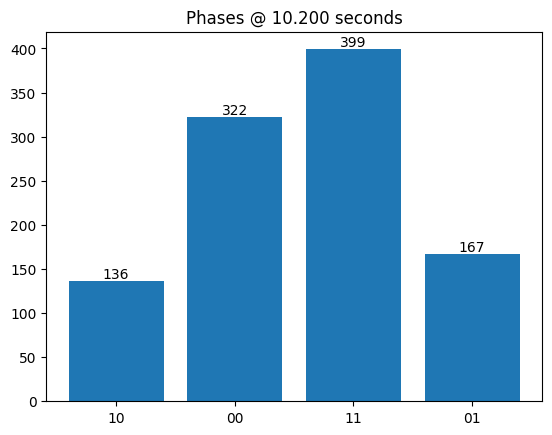

Time simulation run (sec):  10.3
{'01': 23, '10': 25, '00': 587, '11': 389}
['01', '10', '00', '11']
[23, 25, 587, 389]


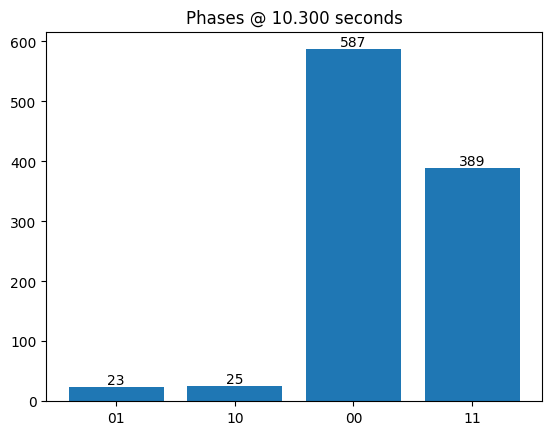

Time simulation run (sec):  10.4
{'01': 26, '10': 19, '00': 306, '11': 673}
['01', '10', '00', '11']
[26, 19, 306, 673]


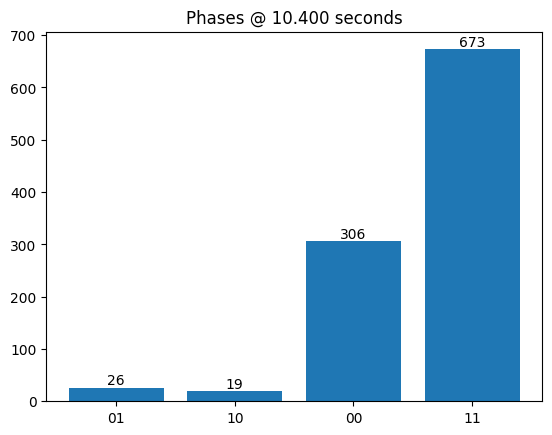

Time simulation run (sec):  10.5
{'01': 147, '11': 198, '10': 149, '00': 530}
['01', '11', '10', '00']
[147, 198, 149, 530]


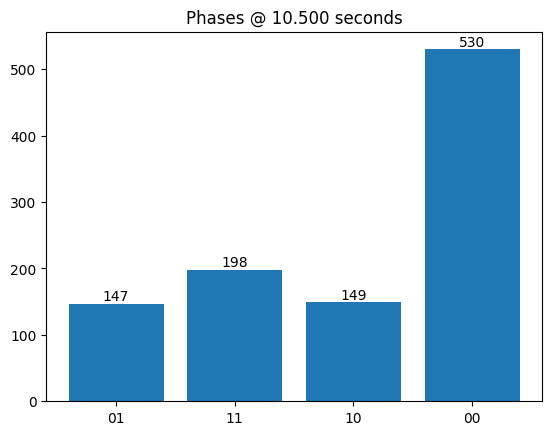

Time simulation run (sec):  10.6
{'11': 321, '10': 227, '00': 226, '01': 250}
['11', '10', '00', '01']
[321, 227, 226, 250]


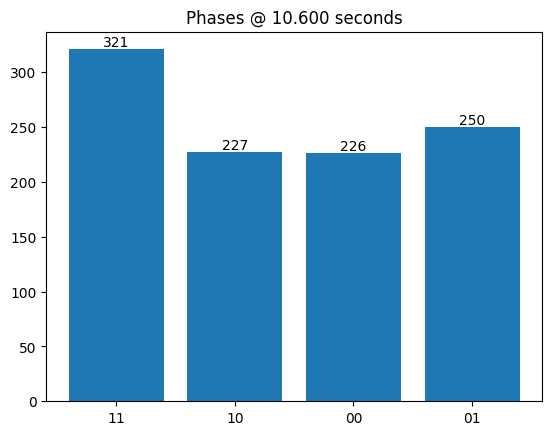

Time simulation run (sec):  10.700000000000001
{'11': 464, '01': 213, '00': 136, '10': 211}
['11', '01', '00', '10']
[464, 213, 136, 211]


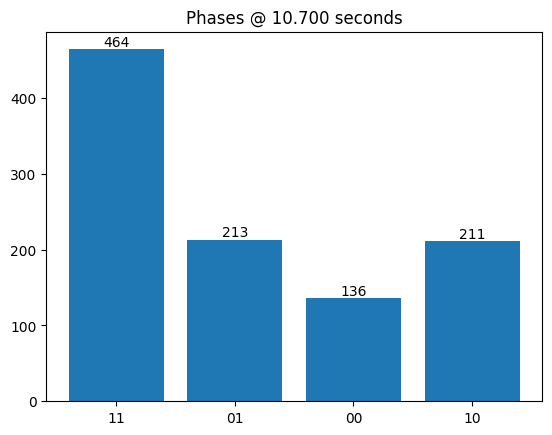

Time simulation run (sec):  10.8
{'11': 53, '01': 78, '10': 68, '00': 825}
['11', '01', '10', '00']
[53, 78, 68, 825]


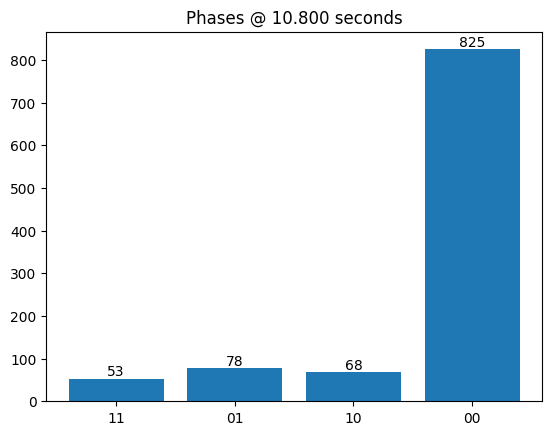

Time simulation run (sec):  10.9
{'00': 27, '11': 997}
['00', '11']
[27, 997]


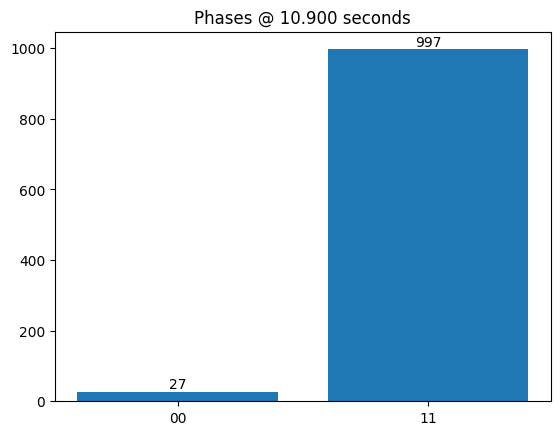

Time simulation run (sec):  11.0
{'11': 17, '01': 82, '10': 72, '00': 853}
['11', '01', '10', '00']
[17, 82, 72, 853]


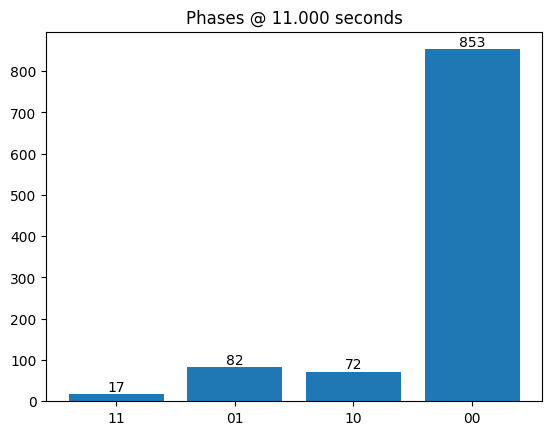

Time simulation run (sec):  11.1
{'01': 237, '11': 462, '00': 98, '10': 227}
['01', '11', '00', '10']
[237, 462, 98, 227]


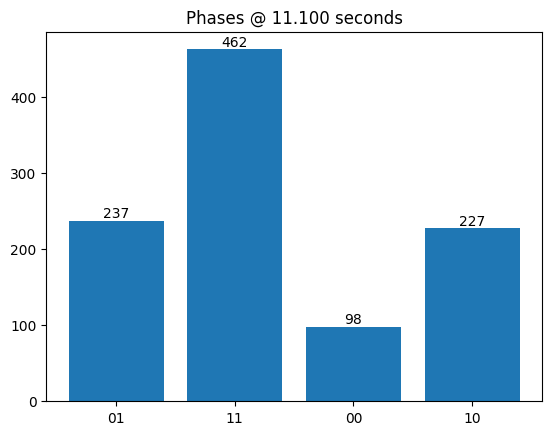

Time simulation run (sec):  11.200000000000001
{'01': 236, '11': 364, '10': 257, '00': 167}
['01', '11', '10', '00']
[236, 364, 257, 167]


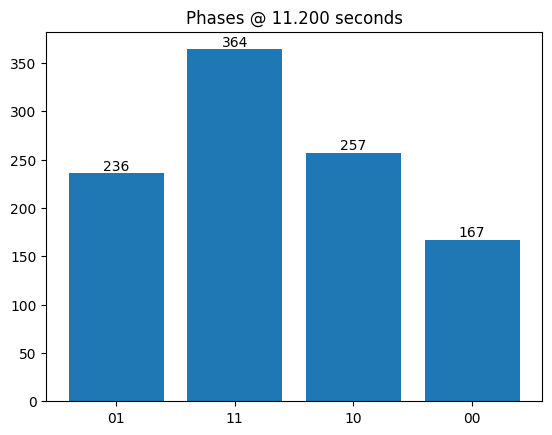

Time simulation run (sec):  11.3
{'11': 49, '10': 130, '00': 693, '01': 152}
['11', '10', '00', '01']
[49, 130, 693, 152]


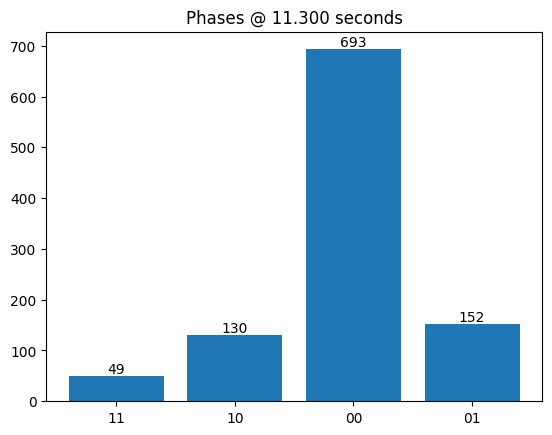

Time simulation run (sec):  11.4
{'01': 11, '10': 16, '00': 81, '11': 916}
['01', '10', '00', '11']
[11, 16, 81, 916]


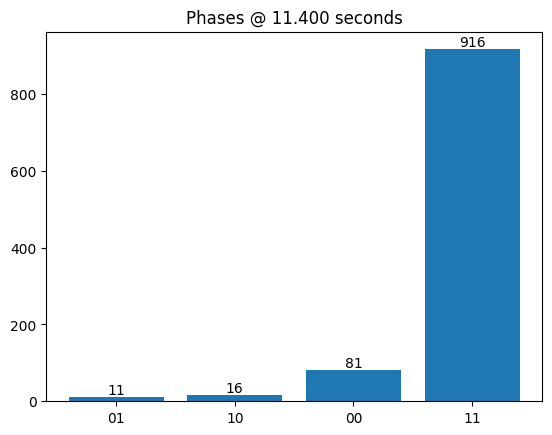

Time simulation run (sec):  11.5
{'01': 26, '11': 133, '10': 12, '00': 853}
['01', '11', '10', '00']
[26, 133, 12, 853]


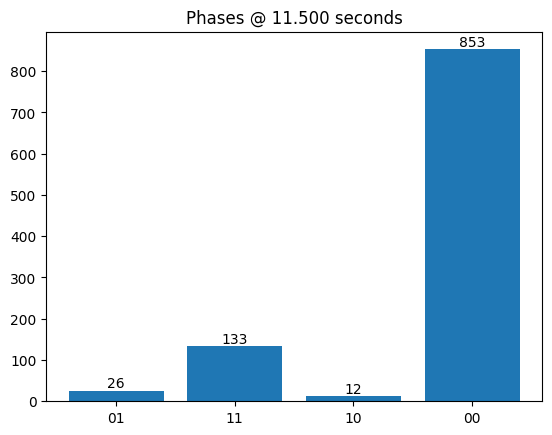

Time simulation run (sec):  11.6
{'01': 163, '10': 147, '00': 144, '11': 570}
['01', '10', '00', '11']
[163, 147, 144, 570]


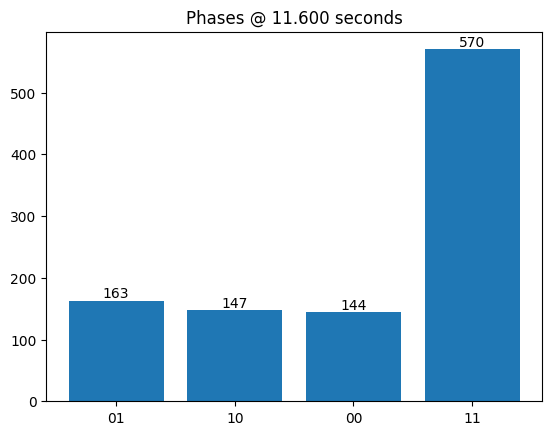

Time simulation run (sec):  11.700000000000001
{'01': 263, '00': 266, '10': 236, '11': 259}
['01', '00', '10', '11']
[263, 266, 236, 259]


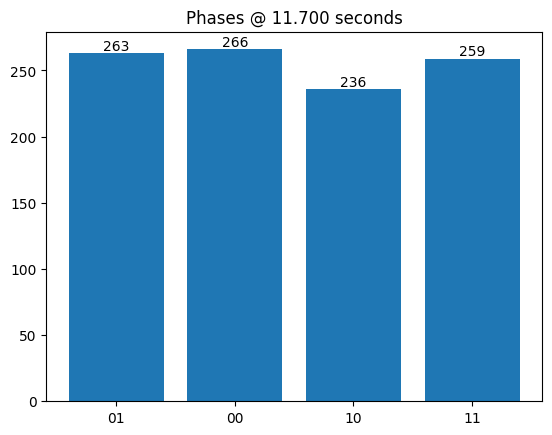

Time simulation run (sec):  11.8
{'01': 209, '11': 232, '10': 204, '00': 379}
['01', '11', '10', '00']
[209, 232, 204, 379]


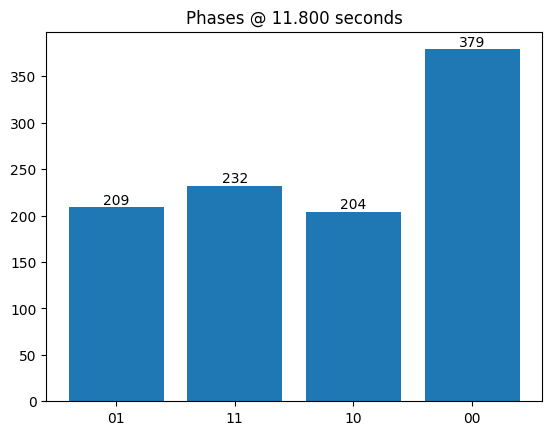

Time simulation run (sec):  11.9
{'01': 47, '10': 45, '00': 369, '11': 563}
['01', '10', '00', '11']
[47, 45, 369, 563]


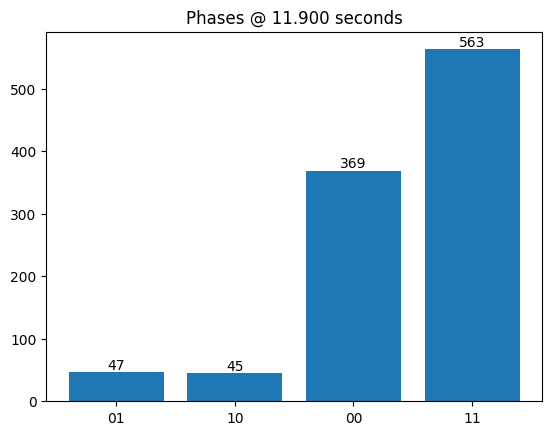

Time simulation run (sec):  12.0
{'01': 4, '11': 501, '00': 519}
['01', '11', '00']
[4, 501, 519]


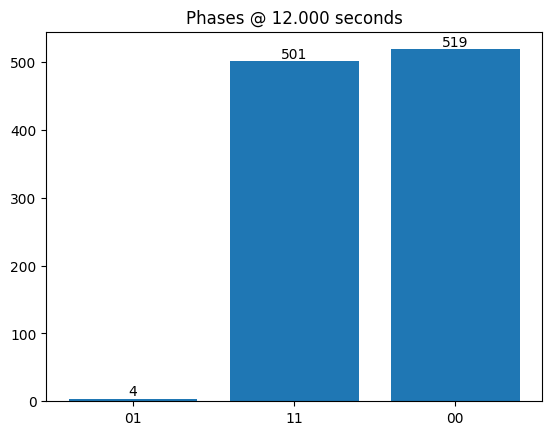

Time simulation run (sec):  12.1
{'01': 112, '11': 327, '10': 103, '00': 482}
['01', '11', '10', '00']
[112, 327, 103, 482]


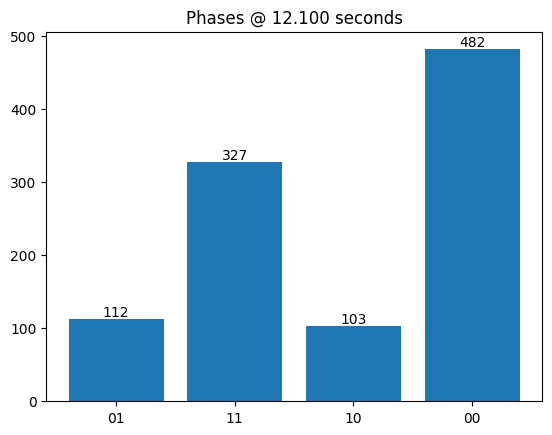

Time simulation run (sec):  12.200000000000001
{'01': 230, '11': 299, '00': 277, '10': 218}
['01', '11', '00', '10']
[230, 299, 277, 218]


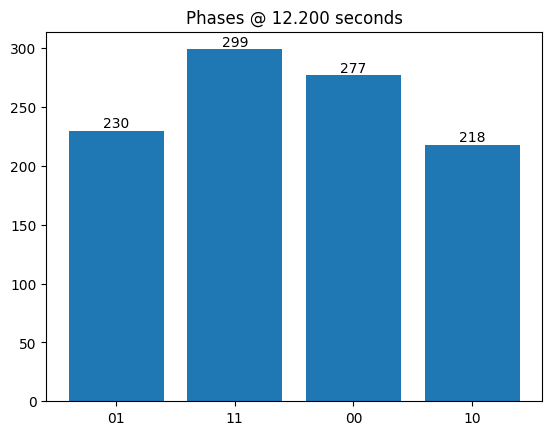

Time simulation run (sec):  12.3
{'01': 238, '11': 332, '00': 193, '10': 261}
['01', '11', '00', '10']
[238, 332, 193, 261]


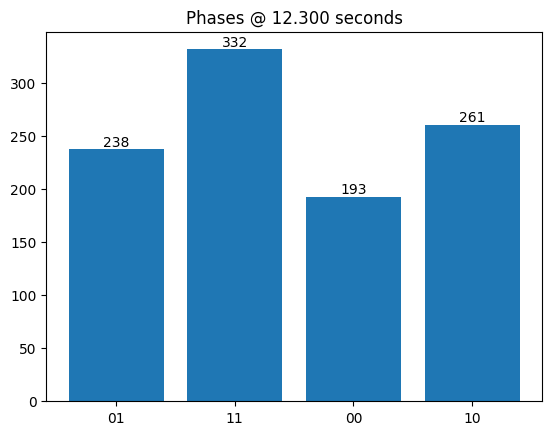

Time simulation run (sec):  12.4
{'01': 114, '11': 142, '10': 111, '00': 657}
['01', '11', '10', '00']
[114, 142, 111, 657]


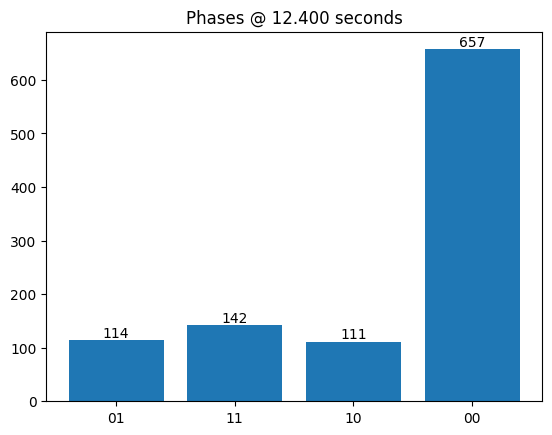

Time simulation run (sec):  12.5
{'01': 14, '10': 9, '00': 142, '11': 859}
['01', '10', '00', '11']
[14, 9, 142, 859]


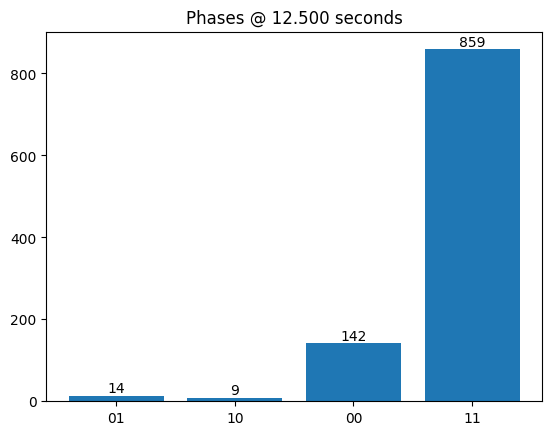

Time simulation run (sec):  12.6
{'01': 38, '11': 79, '10': 38, '00': 869}
['01', '11', '10', '00']
[38, 79, 38, 869]


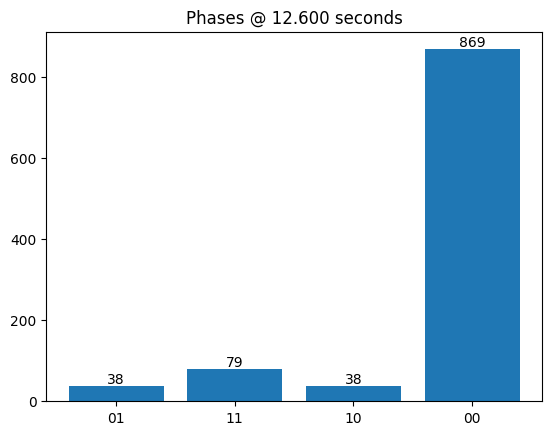

Time simulation run (sec):  12.700000000000001
{'00': 75, '10': 175, '11': 587, '01': 187}
['00', '10', '11', '01']
[75, 175, 587, 187]


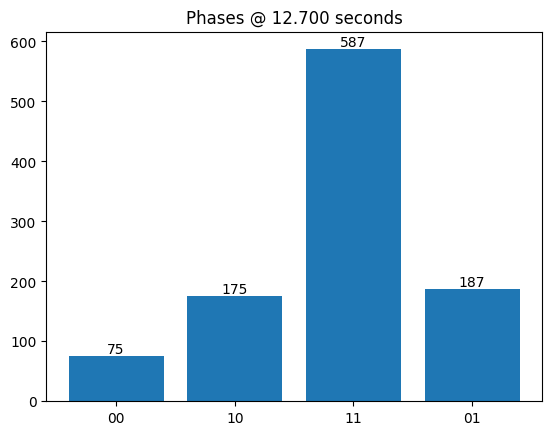

Time simulation run (sec):  12.8
{'11': 245, '10': 240, '00': 273, '01': 266}
['11', '10', '00', '01']
[245, 240, 273, 266]


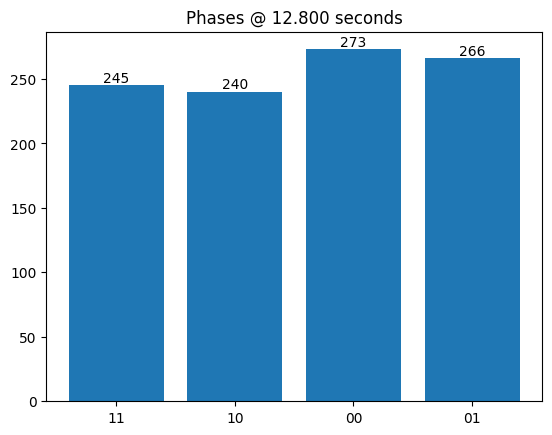

Time simulation run (sec):  12.9
{'11': 78, '00': 585, '10': 180, '01': 181}
['11', '00', '10', '01']
[78, 585, 180, 181]


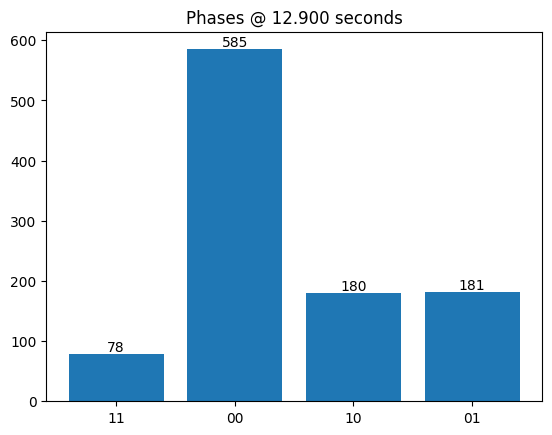

Time simulation run (sec):  13.0
{'01': 52, '00': 2, '10': 37, '11': 933}
['01', '00', '10', '11']
[52, 2, 37, 933]


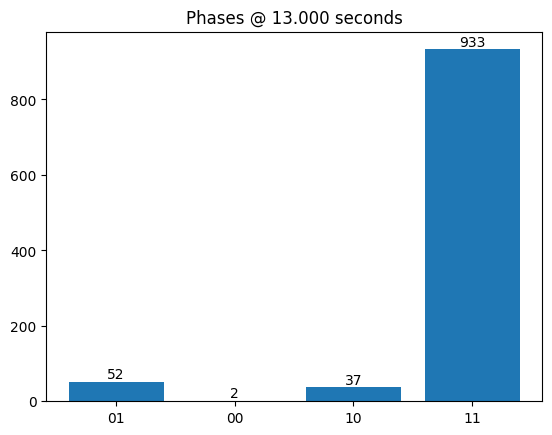

Time simulation run (sec):  13.1
{'01': 3, '11': 16, '10': 4, '00': 1001}
['01', '11', '10', '00']
[3, 16, 4, 1001]


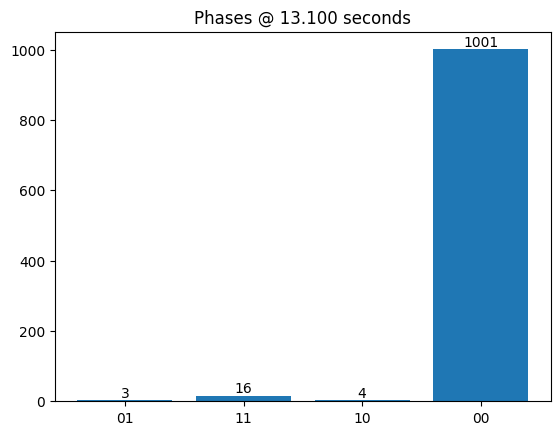

Time simulation run (sec):  13.200000000000001
{'00': 48, '10': 108, '01': 104, '11': 764}
['00', '10', '01', '11']
[48, 108, 104, 764]


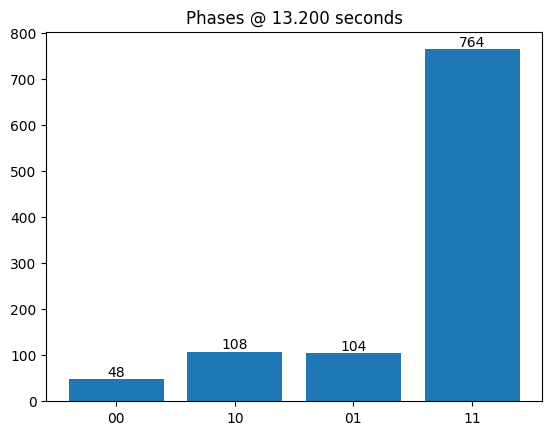

Time simulation run (sec):  13.3
{'01': 225, '11': 147, '10': 224, '00': 428}
['01', '11', '10', '00']
[225, 147, 224, 428]


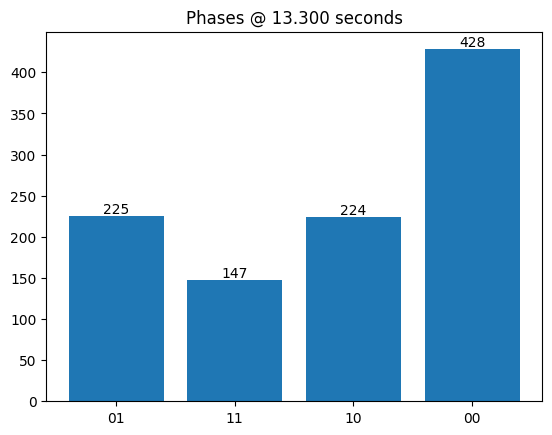

Time simulation run (sec):  13.4
{'01': 253, '11': 166, '00': 367, '10': 238}
['01', '11', '00', '10']
[253, 166, 367, 238]


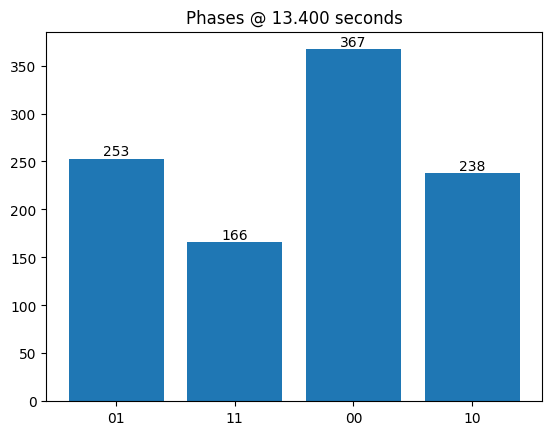

Time simulation run (sec):  13.5
{'01': 93, '10': 126, '00': 175, '11': 630}
['01', '10', '00', '11']
[93, 126, 175, 630]


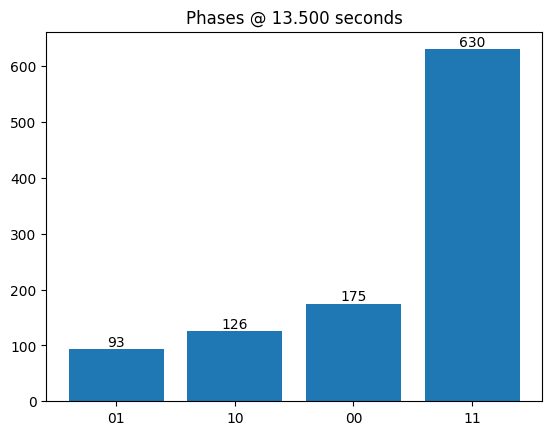

Time simulation run (sec):  13.6
{'01': 3, '11': 278, '10': 5, '00': 738}
['01', '11', '10', '00']
[3, 278, 5, 738]


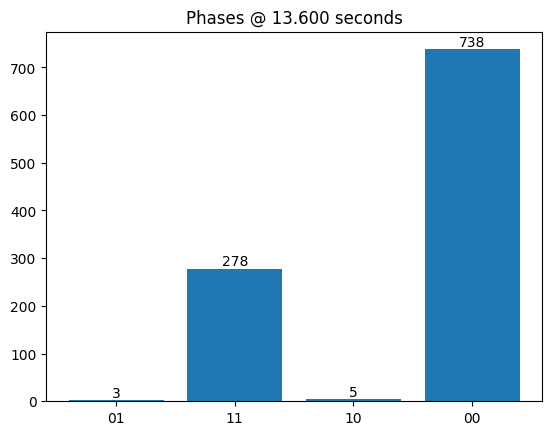

Time simulation run (sec):  13.700000000000001
{'01': 54, '11': 564, '10': 64, '00': 342}
['01', '11', '10', '00']
[54, 564, 64, 342]


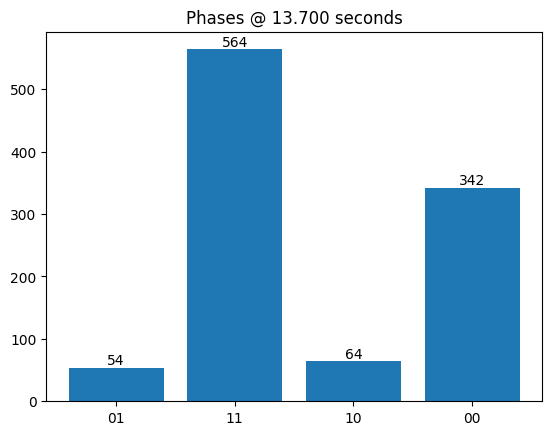

Time simulation run (sec):  13.8
{'11': 297, '01': 207, '00': 339, '10': 181}
['11', '01', '00', '10']
[297, 207, 339, 181]


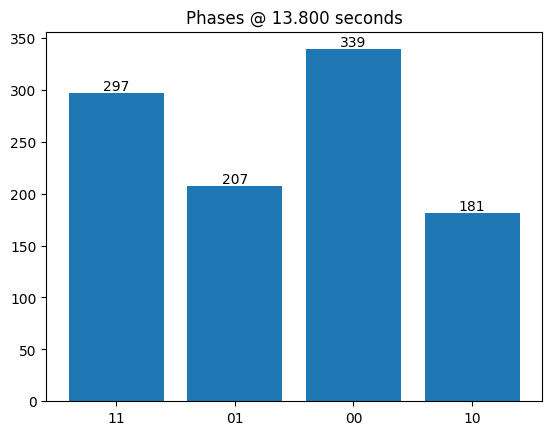

Time simulation run (sec):  13.9
{'10': 247, '00': 253, '11': 247, '01': 277}
['10', '00', '11', '01']
[247, 253, 247, 277]


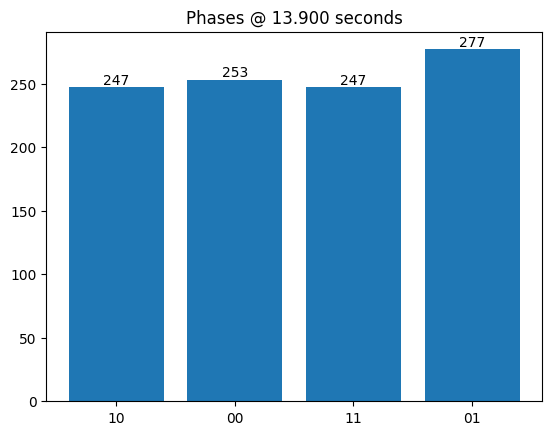

Time simulation run (sec):  14.0
{'10': 159, '00': 416, '11': 264, '01': 185}
['10', '00', '11', '01']
[159, 416, 264, 185]


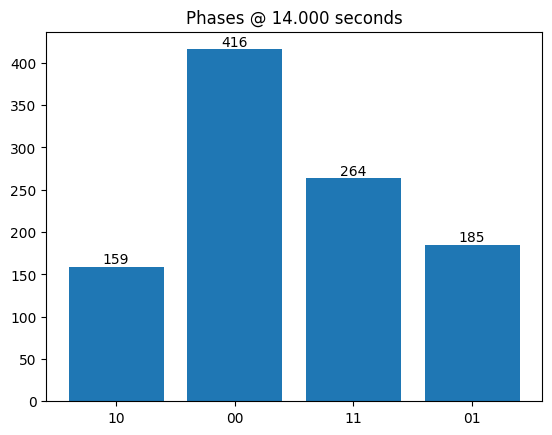

Time simulation run (sec):  14.1
{'01': 33, '10': 34, '00': 274, '11': 683}
['01', '10', '00', '11']
[33, 34, 274, 683]


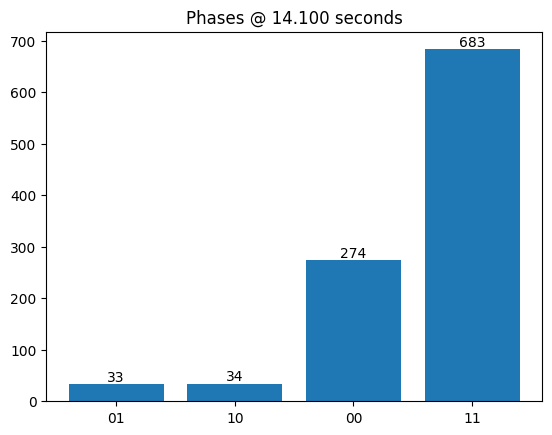

Time simulation run (sec):  14.200000000000001
{'01': 17, '10': 8, '00': 776, '11': 223}
['01', '10', '00', '11']
[17, 8, 776, 223]


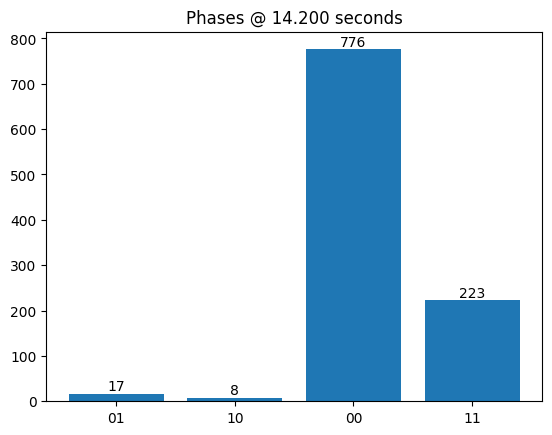

Time simulation run (sec):  14.3
{'01': 104, '11': 635, '00': 139, '10': 146}
['01', '11', '00', '10']
[104, 635, 139, 146]


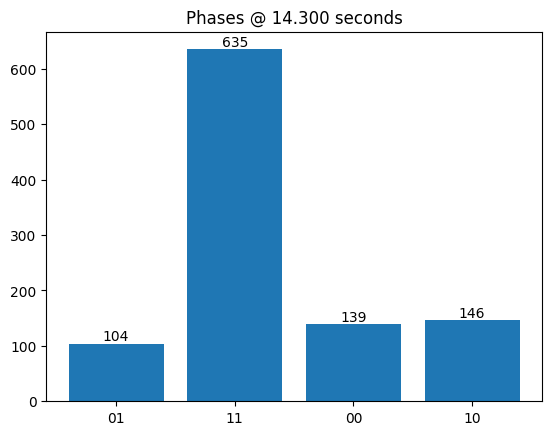

Time simulation run (sec):  14.4
{'01': 258, '11': 173, '00': 350, '10': 243}
['01', '11', '00', '10']
[258, 173, 350, 243]


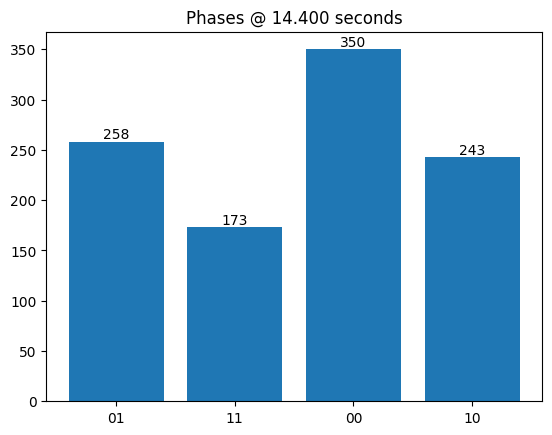

Time simulation run (sec):  14.5
{'11': 135, '01': 225, '10': 214, '00': 450}
['11', '01', '10', '00']
[135, 225, 214, 450]


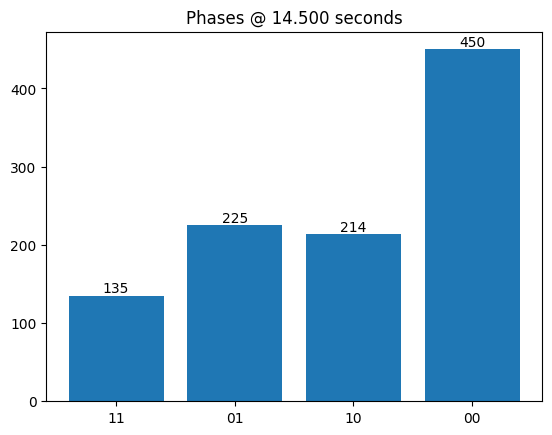

Time simulation run (sec):  14.6
{'01': 74, '10': 80, '00': 38, '11': 832}
['01', '10', '00', '11']
[74, 80, 38, 832]


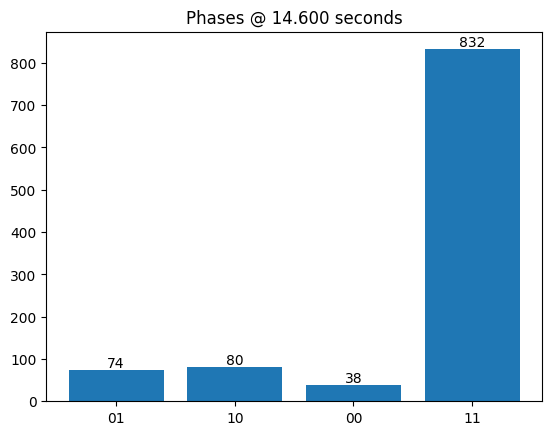

Time simulation run (sec):  14.700000000000001
{'11': 4, '00': 1018, '01': 2}
['11', '00', '01']
[4, 1018, 2]


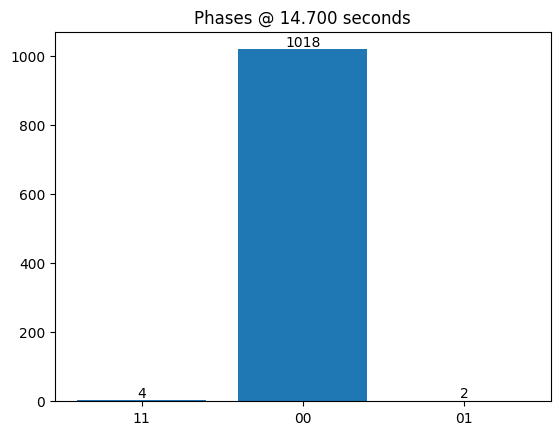

Time simulation run (sec):  14.8
{'00': 6, '10': 62, '01': 76, '11': 880}
['00', '10', '01', '11']
[6, 62, 76, 880]


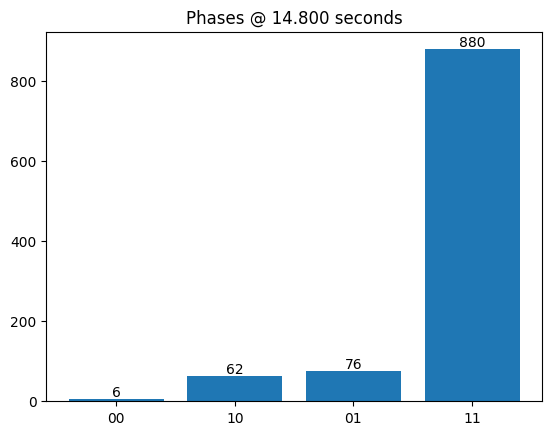

Time simulation run (sec):  14.9
{'11': 81, '01': 192, '10': 194, '00': 557}
['11', '01', '10', '00']
[81, 192, 194, 557]


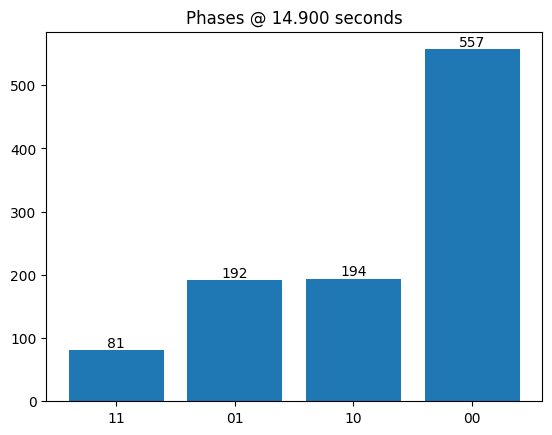

Time simulation run (sec):  15.0
{'11': 202, '01': 268, '10': 260, '00': 294}
['11', '01', '10', '00']
[202, 268, 260, 294]


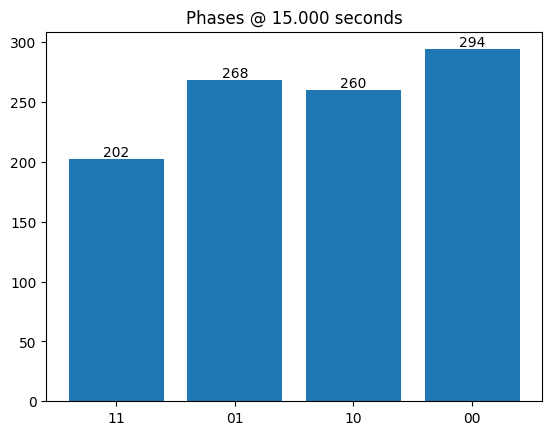

Time simulation run (sec):  15.1
{'01': 152, '00': 71, '10': 168, '11': 633}
['01', '00', '10', '11']
[152, 71, 168, 633]


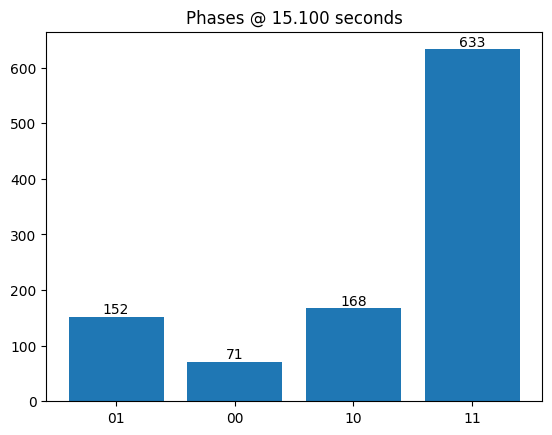

Time simulation run (sec):  15.200000000000001
{'01': 22, '10': 22, '00': 853, '11': 127}
['01', '10', '00', '11']
[22, 22, 853, 127]


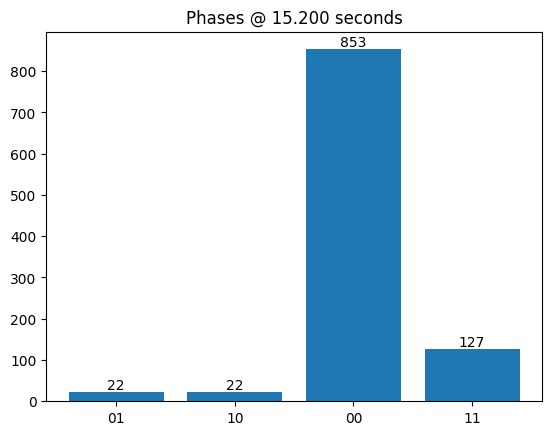

Time simulation run (sec):  15.3
{'01': 22, '11': 830, '10': 11, '00': 161}
['01', '11', '10', '00']
[22, 830, 11, 161]


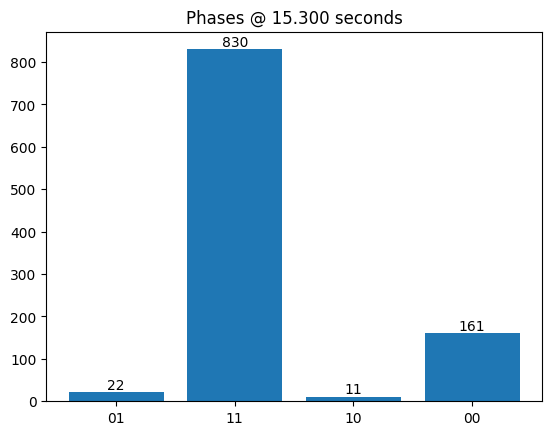

Time simulation run (sec):  15.4
{'11': 214, '01': 132, '10': 139, '00': 539}
['11', '01', '10', '00']
[214, 132, 139, 539]


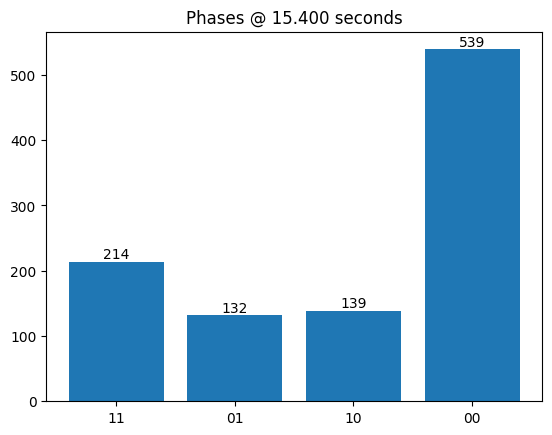

Time simulation run (sec):  15.5
{'01': 268, '11': 279, '10': 241, '00': 236}
['01', '11', '10', '00']
[268, 279, 241, 236]


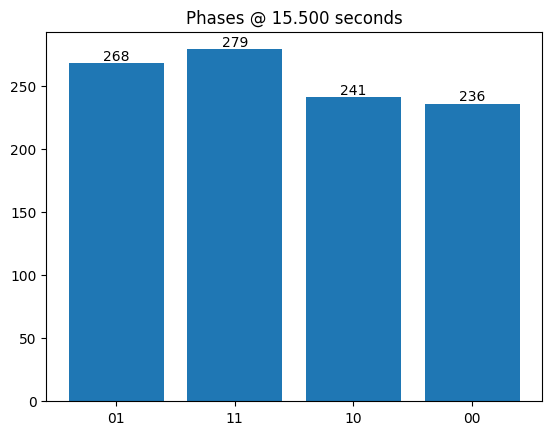

Time simulation run (sec):  15.6
{'01': 230, '10': 203, '00': 275, '11': 316}
['01', '10', '00', '11']
[230, 203, 275, 316]


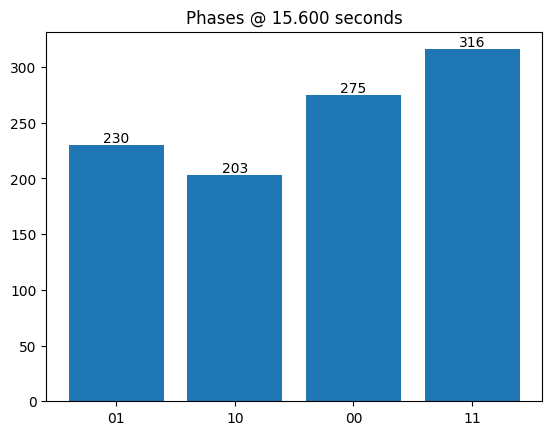

Time simulation run (sec):  15.700000000000001
{'01': 66, '11': 460, '10': 67, '00': 431}
['01', '11', '10', '00']
[66, 460, 67, 431]


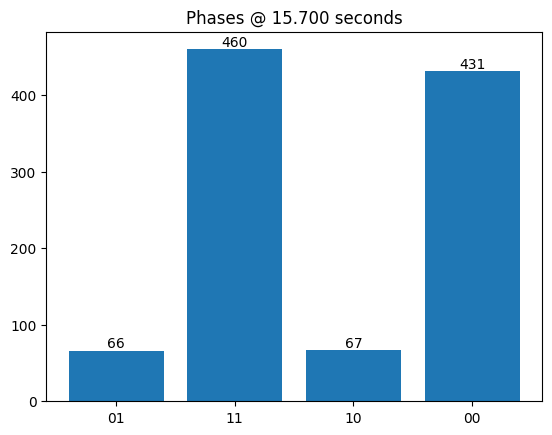

Time simulation run (sec):  15.8
{'00': 581, '11': 443}
['00', '11']
[581, 443]


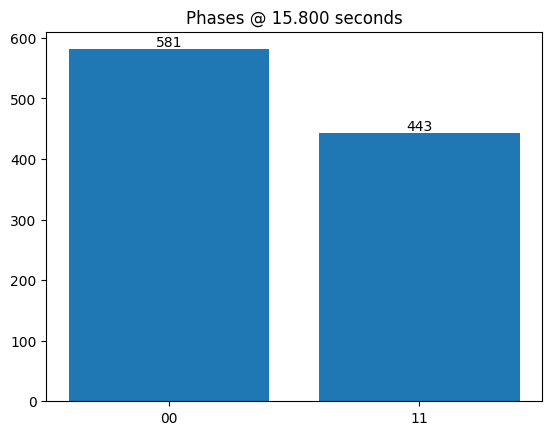

Time simulation run (sec):  15.9
{'01': 70, '10': 81, '00': 312, '11': 561}
['01', '10', '00', '11']
[70, 81, 312, 561]


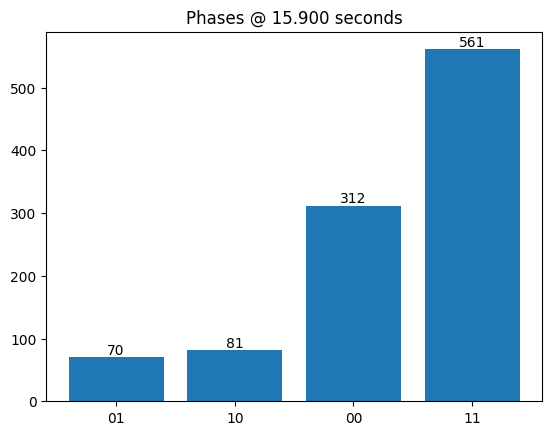

Time simulation run (sec):  16.0
{'01': 207, '10': 219, '00': 395, '11': 203}
['01', '10', '00', '11']
[207, 219, 395, 203]


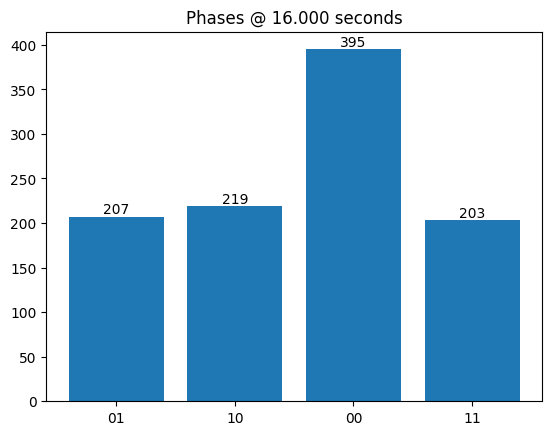

Time simulation run (sec):  16.1
{'01': 237, '00': 326, '10': 266, '11': 195}
['01', '00', '10', '11']
[237, 326, 266, 195]


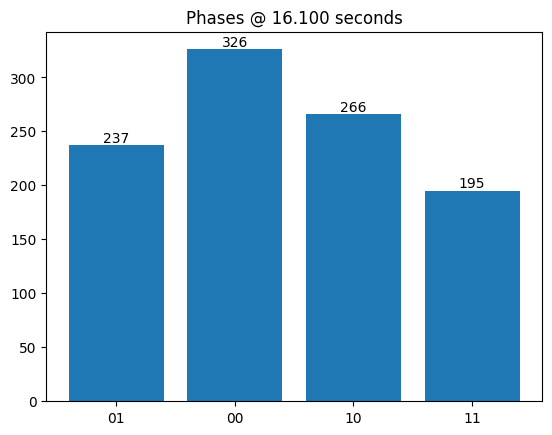

Time simulation run (sec):  16.2
{'01': 152, '00': 108, '10': 131, '11': 633}
['01', '00', '10', '11']
[152, 108, 131, 633]


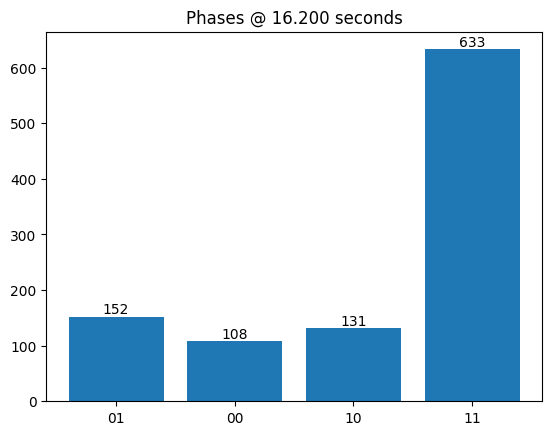

Time simulation run (sec):  16.3
{'01': 10, '11': 91, '10': 20, '00': 903}
['01', '11', '10', '00']
[10, 91, 20, 903]


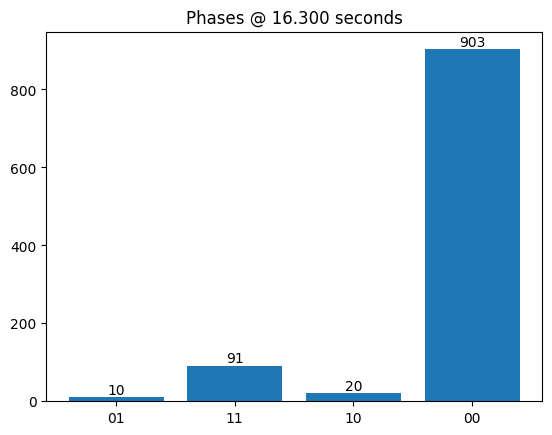

Time simulation run (sec):  16.4
{'01': 23, '10': 18, '00': 35, '11': 948}
['01', '10', '00', '11']
[23, 18, 35, 948]


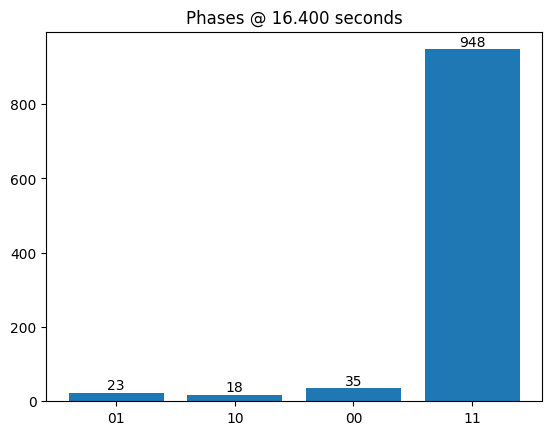

Time simulation run (sec):  16.5
{'11': 58, '01': 143, '10': 160, '00': 663}
['11', '01', '10', '00']
[58, 143, 160, 663]


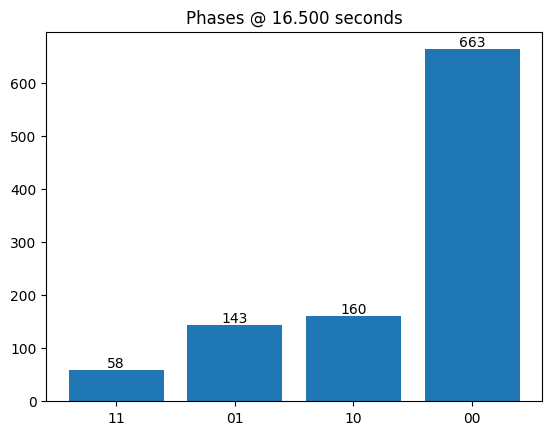

Time simulation run (sec):  16.6
{'01': 241, '11': 329, '00': 217, '10': 237}
['01', '11', '00', '10']
[241, 329, 217, 237]


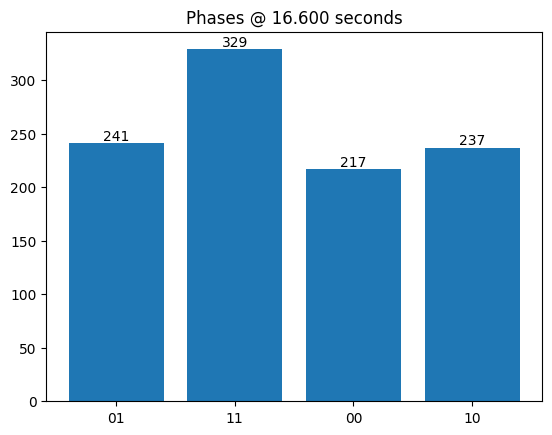

Time simulation run (sec):  16.7
{'01': 191, '00': 69, '10': 188, '11': 576}
['01', '00', '10', '11']
[191, 69, 188, 576]


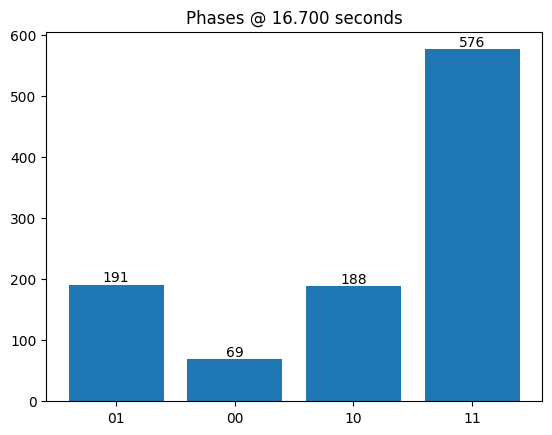

Time simulation run (sec):  16.8
{'11': 20, '01': 59, '10': 54, '00': 891}
['11', '01', '10', '00']
[20, 59, 54, 891]


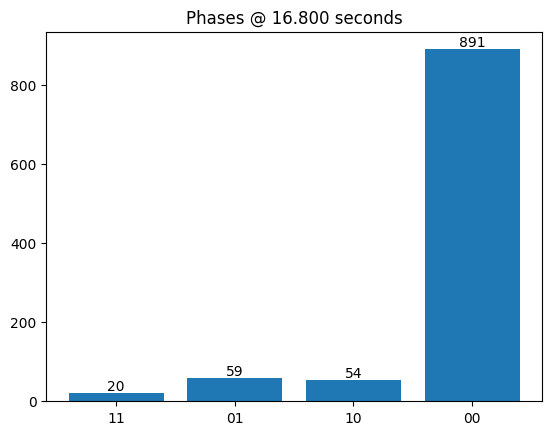

Time simulation run (sec):  16.9
{'00': 43, '11': 981}
['00', '11']
[43, 981]


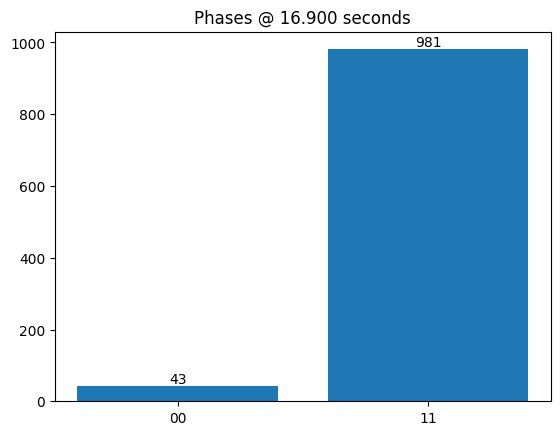

Time simulation run (sec):  17.0
{'11': 69, '10': 103, '00': 768, '01': 84}
['11', '10', '00', '01']
[69, 103, 768, 84]


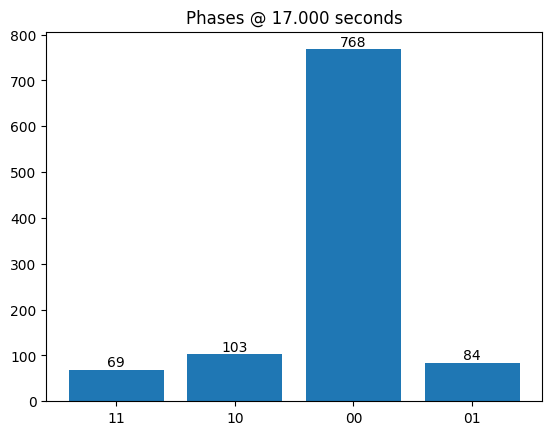

Time simulation run (sec):  17.1
{'01': 214, '00': 174, '10': 212, '11': 424}
['01', '00', '10', '11']
[214, 174, 212, 424]


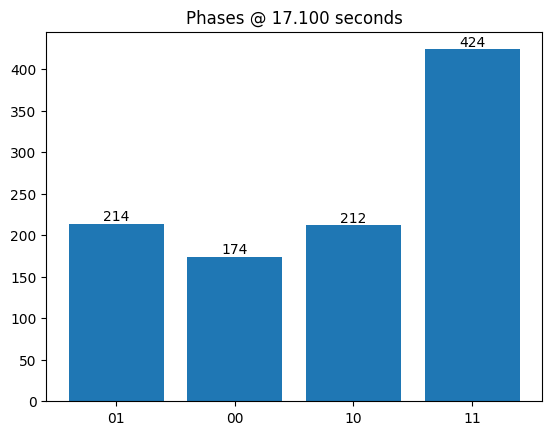

Time simulation run (sec):  17.2
{'01': 263, '00': 219, '10': 242, '11': 300}
['01', '00', '10', '11']
[263, 219, 242, 300]


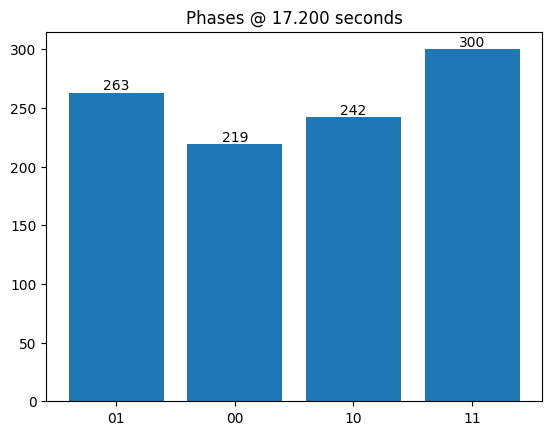

Time simulation run (sec):  17.3
{'01': 143, '11': 226, '10': 131, '00': 524}
['01', '11', '10', '00']
[143, 226, 131, 524]


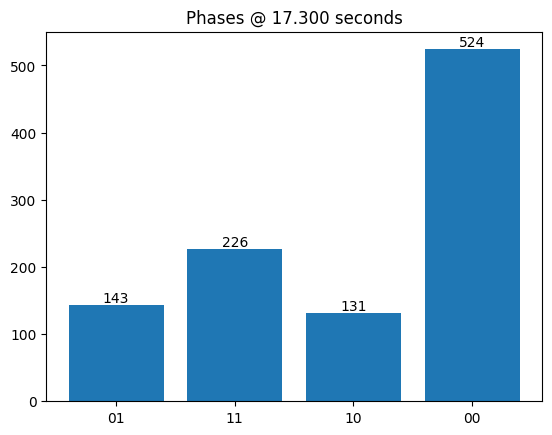

Time simulation run (sec):  17.400000000000002
{'11': 633, '01': 10, '10': 7, '00': 374}
['11', '01', '10', '00']
[633, 10, 7, 374]


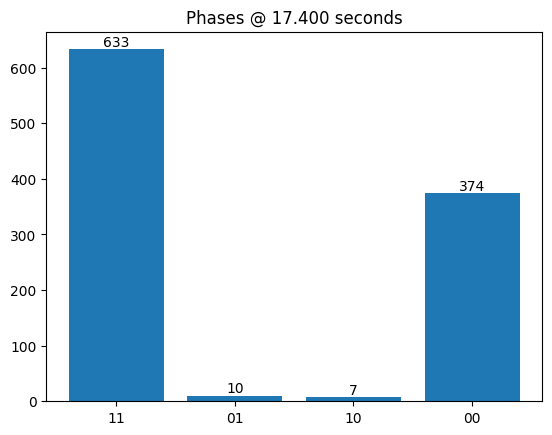

Time simulation run (sec):  17.5
{'01': 36, '11': 425, '00': 531, '10': 32}
['01', '11', '00', '10']
[36, 425, 531, 32]


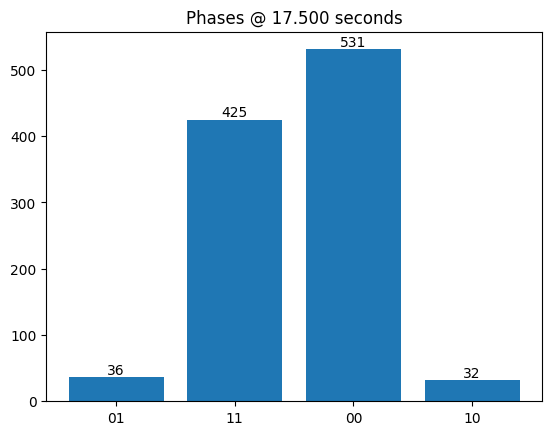

Time simulation run (sec):  17.6
{'11': 335, '01': 186, '10': 163, '00': 340}
['11', '01', '10', '00']
[335, 186, 163, 340]


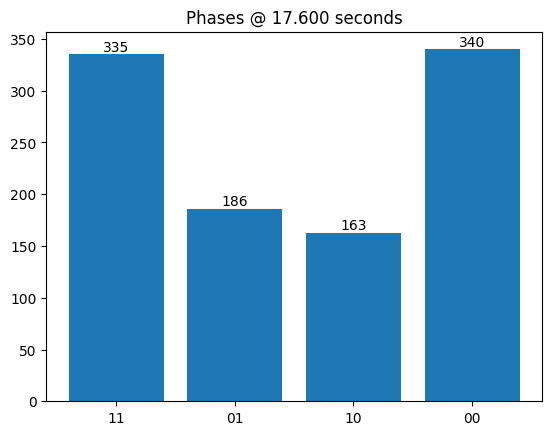

Time simulation run (sec):  17.7
{'01': 248, '11': 250, '10': 238, '00': 288}
['01', '11', '10', '00']
[248, 250, 238, 288]


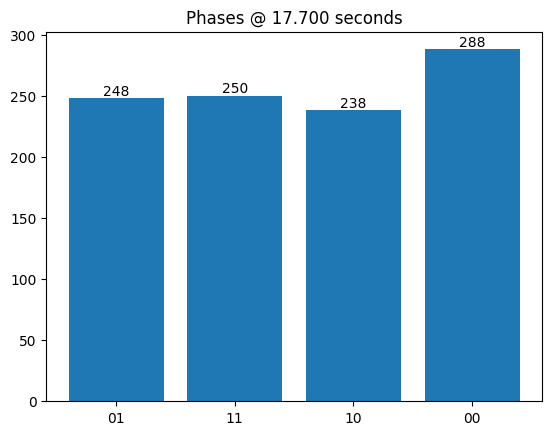

Time simulation run (sec):  17.8
{'01': 179, '11': 422, '00': 229, '10': 194}
['01', '11', '00', '10']
[179, 422, 229, 194]


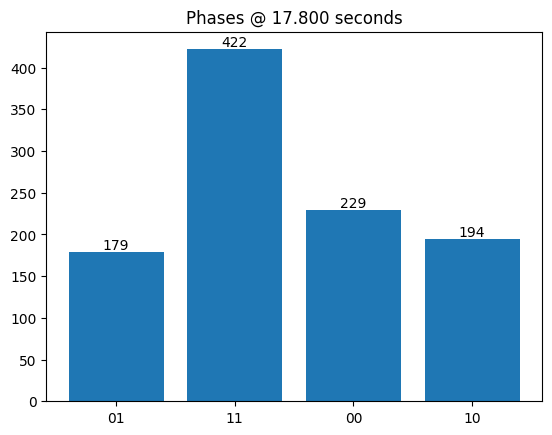

Time simulation run (sec):  17.900000000000002
{'01': 43, '11': 205, '10': 56, '00': 720}
['01', '11', '10', '00']
[43, 205, 56, 720]


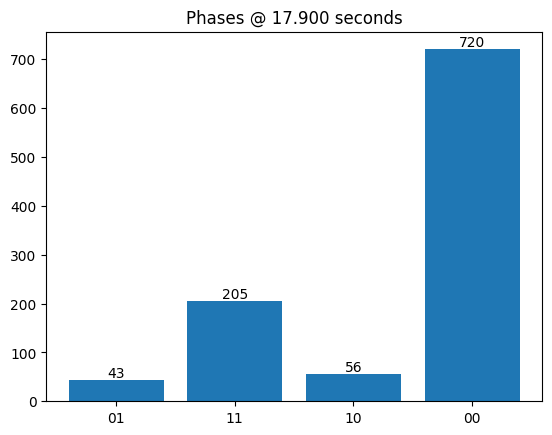

Time simulation run (sec):  18.0
{'01': 5, '10': 1, '00': 160, '11': 858}
['01', '10', '00', '11']
[5, 1, 160, 858]


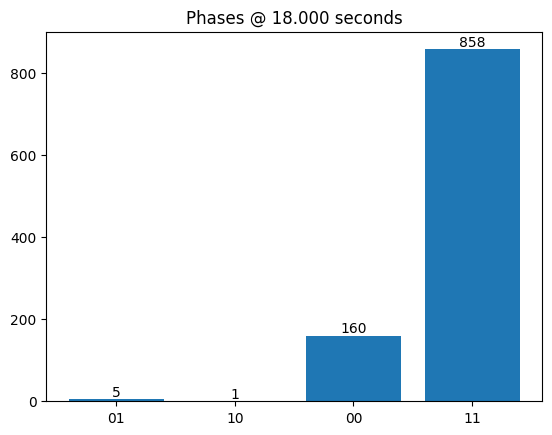

Time simulation run (sec):  18.1
{'10': 105, '00': 723, '11': 96, '01': 100}
['10', '00', '11', '01']
[105, 723, 96, 100]


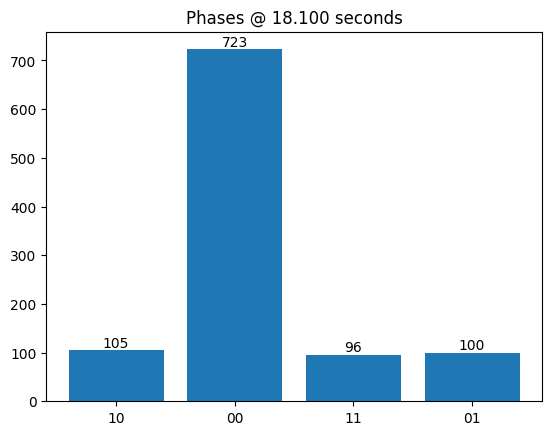

Time simulation run (sec):  18.2
{'01': 237, '00': 160, '10': 219, '11': 408}
['01', '00', '10', '11']
[237, 160, 219, 408]


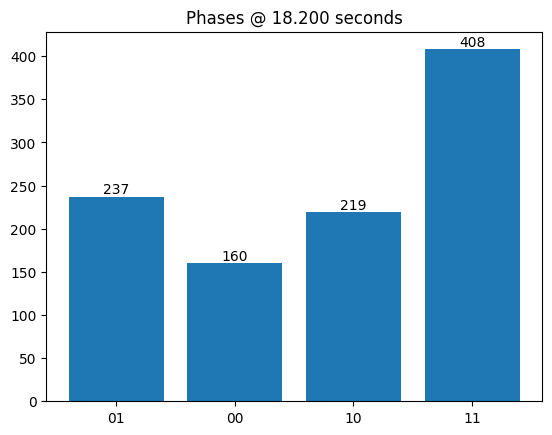

Time simulation run (sec):  18.3
{'10': 223, '00': 143, '11': 427, '01': 231}
['10', '00', '11', '01']
[223, 143, 427, 231]


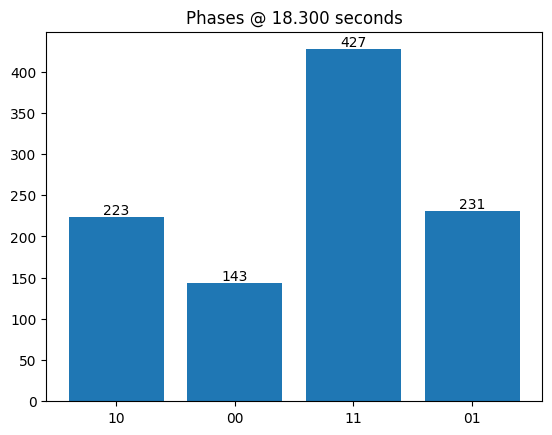

Time simulation run (sec):  18.400000000000002
{'01': 106, '11': 20, '00': 781, '10': 117}
['01', '11', '00', '10']
[106, 20, 781, 117]


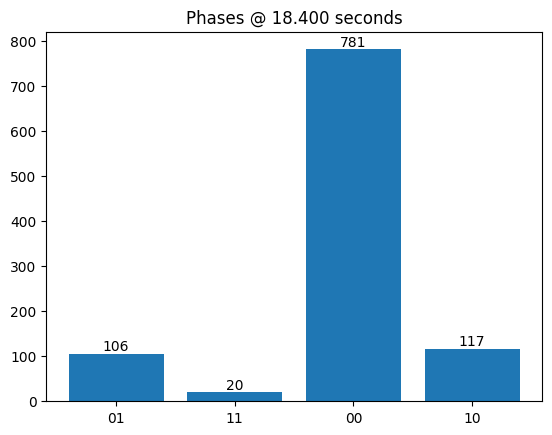

Time simulation run (sec):  18.5
{'10': 7, '01': 3, '11': 1014}
['10', '01', '11']
[7, 3, 1014]


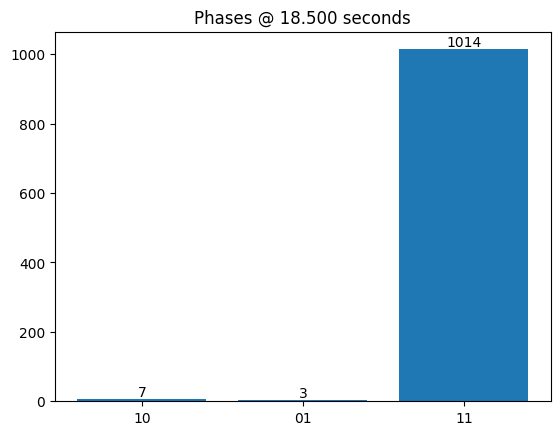

Time simulation run (sec):  18.6
{'11': 7, '01': 36, '10': 57, '00': 924}
['11', '01', '10', '00']
[7, 36, 57, 924]


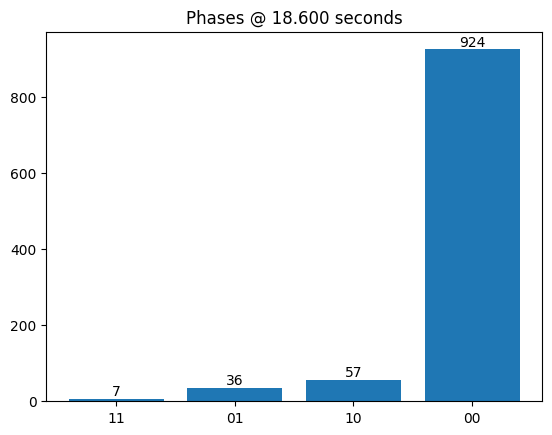

Time simulation run (sec):  18.7
{'01': 194, '00': 76, '10': 181, '11': 573}
['01', '00', '10', '11']
[194, 76, 181, 573]


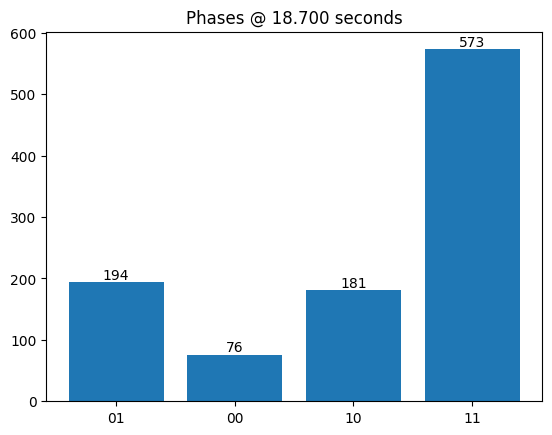

Time simulation run (sec):  18.8
{'01': 271, '11': 231, '10': 281, '00': 241}
['01', '11', '10', '00']
[271, 231, 281, 241]


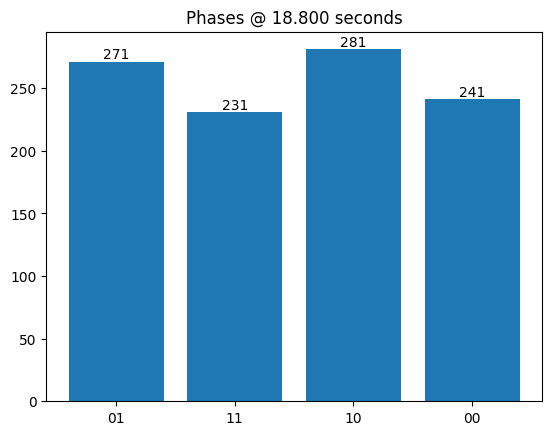

Time simulation run (sec):  18.900000000000002
{'11': 128, '01': 176, '10': 200, '00': 520}
['11', '01', '10', '00']
[128, 176, 200, 520]


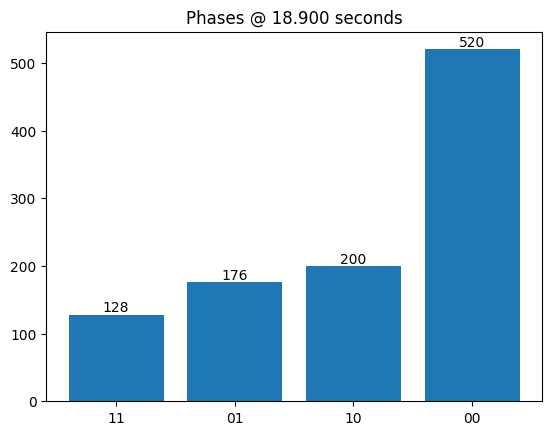

Time simulation run (sec):  19.0
{'01': 49, '10': 34, '00': 201, '11': 740}
['01', '10', '00', '11']
[49, 34, 201, 740]


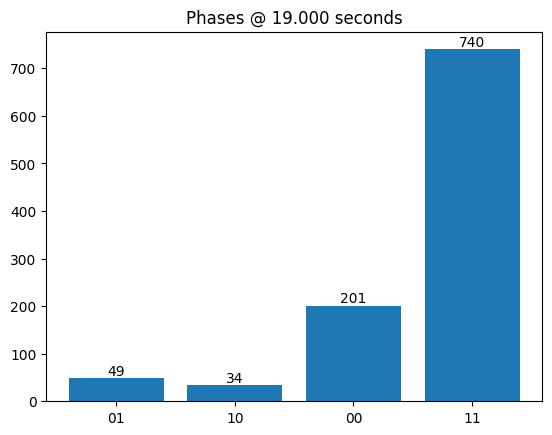

Time simulation run (sec):  19.1
{'01': 4, '10': 4, '00': 738, '11': 278}
['01', '10', '00', '11']
[4, 4, 738, 278]


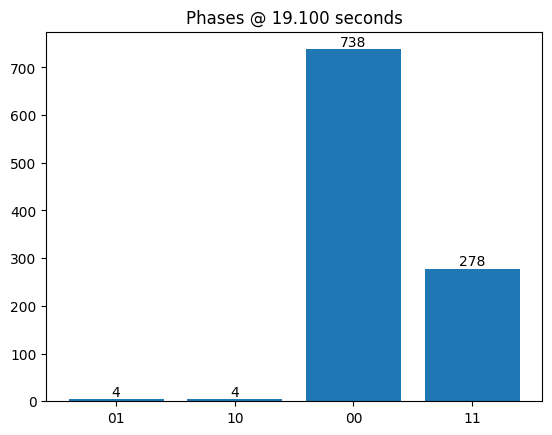

Time simulation run (sec):  19.2
{'11': 515, '01': 120, '10': 124, '00': 265}
['11', '01', '10', '00']
[515, 120, 124, 265]


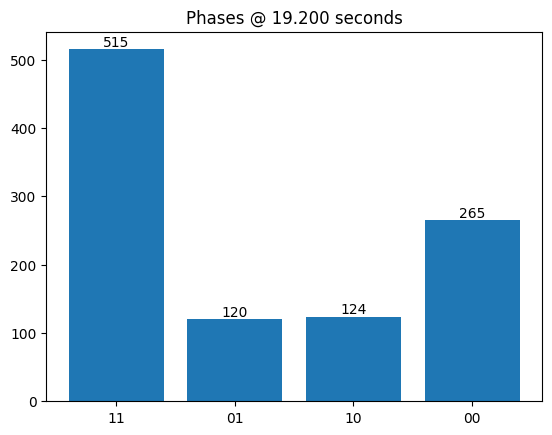

Time simulation run (sec):  19.3
{'11': 218, '01': 253, '10': 256, '00': 297}
['11', '01', '10', '00']
[218, 253, 256, 297]


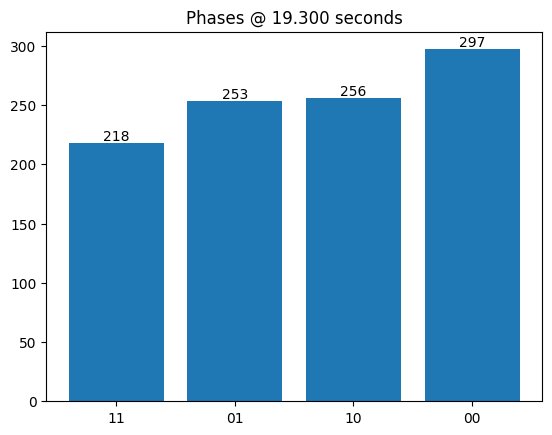

Time simulation run (sec):  19.400000000000002
{'01': 233, '11': 284, '10': 219, '00': 288}
['01', '11', '10', '00']
[233, 284, 219, 288]


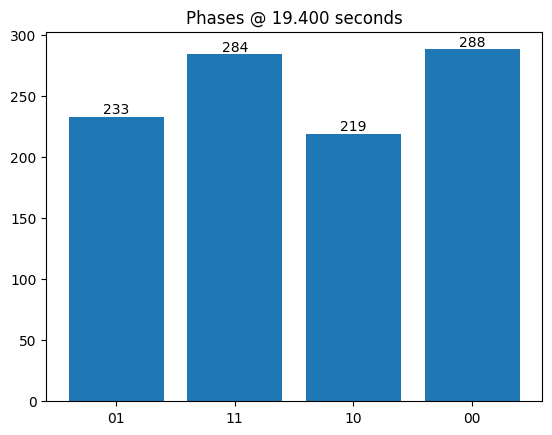

Time simulation run (sec):  19.5
{'01': 99, '11': 345, '10': 88, '00': 492}
['01', '11', '10', '00']
[99, 345, 88, 492]


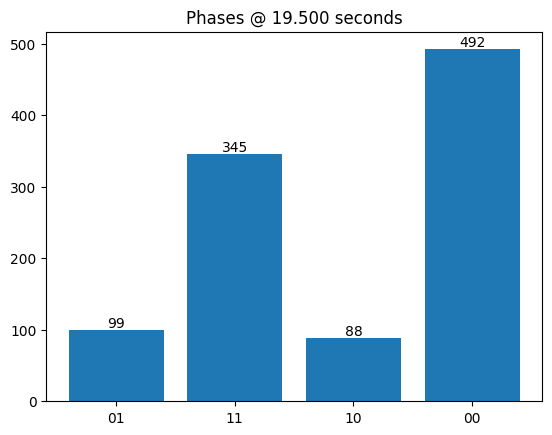

Time simulation run (sec):  19.6
{'01': 1, '10': 2, '00': 358, '11': 663}
['01', '10', '00', '11']
[1, 2, 358, 663]


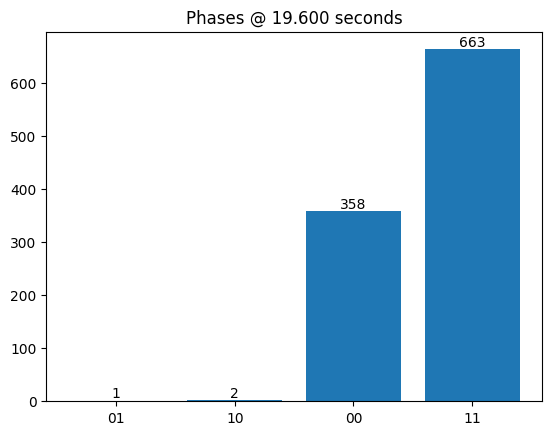

Time simulation run (sec):  19.7
{'01': 64, '11': 247, '10': 51, '00': 662}
['01', '11', '10', '00']
[64, 247, 51, 662]


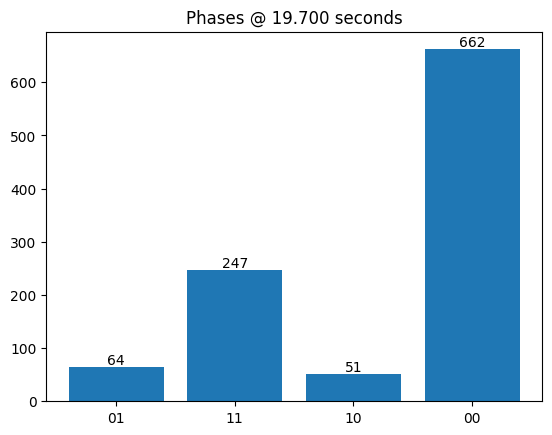

Time simulation run (sec):  19.8
{'01': 201, '00': 190, '10': 205, '11': 428}
['01', '00', '10', '11']
[201, 190, 205, 428]


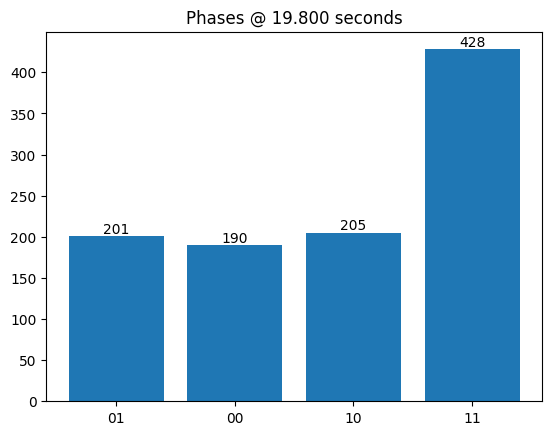

Time simulation run (sec):  19.900000000000002
{'11': 287, '00': 232, '10': 245, '01': 260}
['11', '00', '10', '01']
[287, 232, 245, 260]


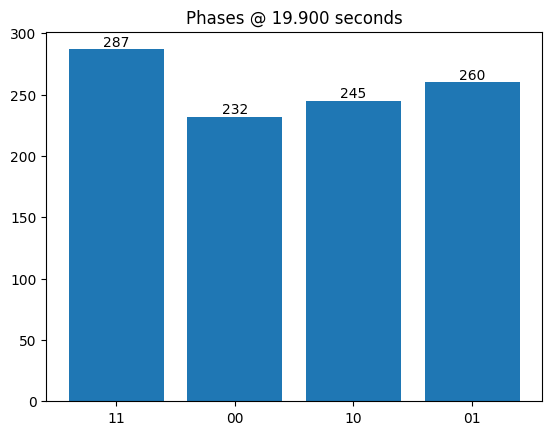

Time simulation run (sec):  20.0
{'01': 146, '10': 172, '00': 634, '11': 72}
['01', '10', '00', '11']
[146, 172, 634, 72]


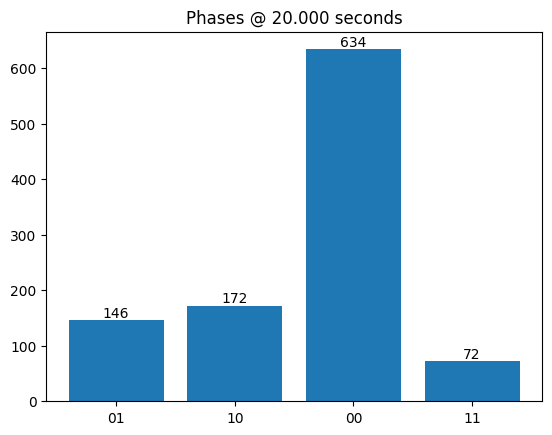

In [ ]:
for time in range(0, 20100, 100):
  CircuitBuilder(time)

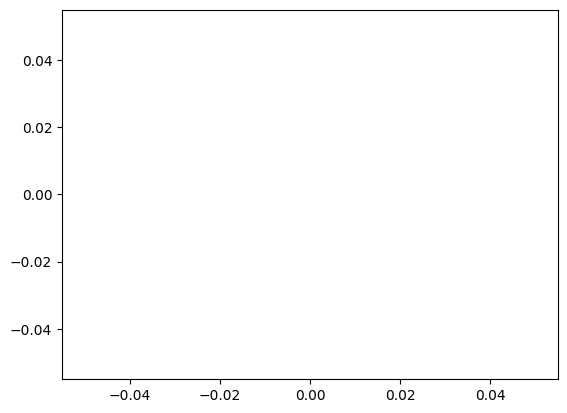

In [ ]:
##TRYING TO MAKE IT A GIF

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure()

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
bar = plt.bar([], [])
plt.bar_label(bar)
titleTime = []
title = "Phases @ {time:.3f} seconds"



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
countList = []
for time in range(0, 500, 100):
  CircuitBuilder(time)
  backend = QasmSimulator()
    # Transpile the quantum circuit to low-level QASM instructions
  circ_compiled = transpile(circ, backend)
    # Execute the circuit on the Qasm simulator, repeating 1024 times
  job_sim = backend.run(circ_compiled, shots=1024)
  result_sim = job_sim.result() # Grab the results from the job
  counts = result_sim.get_counts(circ_compiled) # Get the result
  print(counts)
  countList.append(counts)
  return plot_histogram(counts)
#